In [1]:
from scipy.integrate import odeint
from scipy.optimize import minimize_scalar,minimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
from scipy import stats
from multiprocessing import Process,Queue,Pool
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500
import pickle as pkl
import importlib
from matplotlib.backends.backend_pdf import PdfPages
import sys
sys.path.append("../src/")
from flux_finding_mp import *
rd.seed(1000)
np.random.seed(1000)
from functools import partial
import seaborn as sb
from sklearn.metrics import r2_score

In [2]:
import scipy 
scipy.__version__

'1.7.1'

In [3]:
numCores = 10
numBestFitIters = 1
numSims = 100
ts = np.linspace(0,50,100)

In [4]:
data,lacE,glycolysis,fluxes,conc,c0s,vhvds = generateSyntheticData(ts,0.00)
print(conc)
print(vhvds)
data

{'Lactate': 0.41543095304490785, 'G3P': 0.02898165938687125, 'Malate': 0.9820274845981977, 'NADH': 0.33963768363528857}
{'vhvd_nadh_ldh': 1.1461652571800935, 'vhvd_nadh_mas': 4.709590608729503, 'vhvd_gap_gapdh': 24.56421560434773, 'vhvd_nadh_g3ps': 2.5176584703924934, 'vhvd_dhap_g3ps': 4.289411807437541, 'vhvd_nadh_dhap_g3ps': 1.1880142794414201}


,UL_lac,UL_g3p,UL_malate,UL_nadh,UL_gap,L_lac,L_malate,L_nadh,L_gap,L_g3p_M+1,L_g3p_M+2
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.999446,0.969963,0.999913,0.994663,0.627693,0.000554,0.000087,0.005337,0.372307,0.029742,0.000401
2,0.997538,0.940046,0.999598,0.988137,0.539783,0.002462,0.000402,0.011863,0.460217,0.058162,0.001782
3,0.995125,0.924938,0.999168,0.983926,0.519025,0.004875,0.000832,0.016074,0.480975,0.071675,0.003338
4,0.992918,0.918519,0.998738,0.981624,0.514124,0.007082,0.001262,0.018376,0.485876,0.076974,0.004463
...,...,...,...,...,...,...,...,...,...,...,...
95,0.987498,0.914253,0.997184,0.979332,0.512609,0.012502,0.002816,0.020668,0.487391,0.079882,0.005865
96,0.987498,0.914253,0.997184,0.979332,0.512609,0.012502,0.002816,0.020668,0.487391,0.079882,0.005865
97,0.987498,0.914253,0.997184,0.979332,0.512609,0.012502,0.002816,0.020668,0.487391,0.079882,0.005865
98,0.987498,0.914253,0.997184,0.979332,0.512609,0.012502,0.002816,0.020668,0.487391,0.079882,0.005865


[0.44495764 0.81972867 0.57450789 0.42757956]
0.5716612867509708 0.6958208096995455
[0.28084161 0.04941746 0.40832806 0.5173702 ]
{'Lactate': 0.41543095304490785, 'G3P': 0.02898165938687125, 'Malate': 0.9820274845981977, 'NADH': 0.33963768363528857}


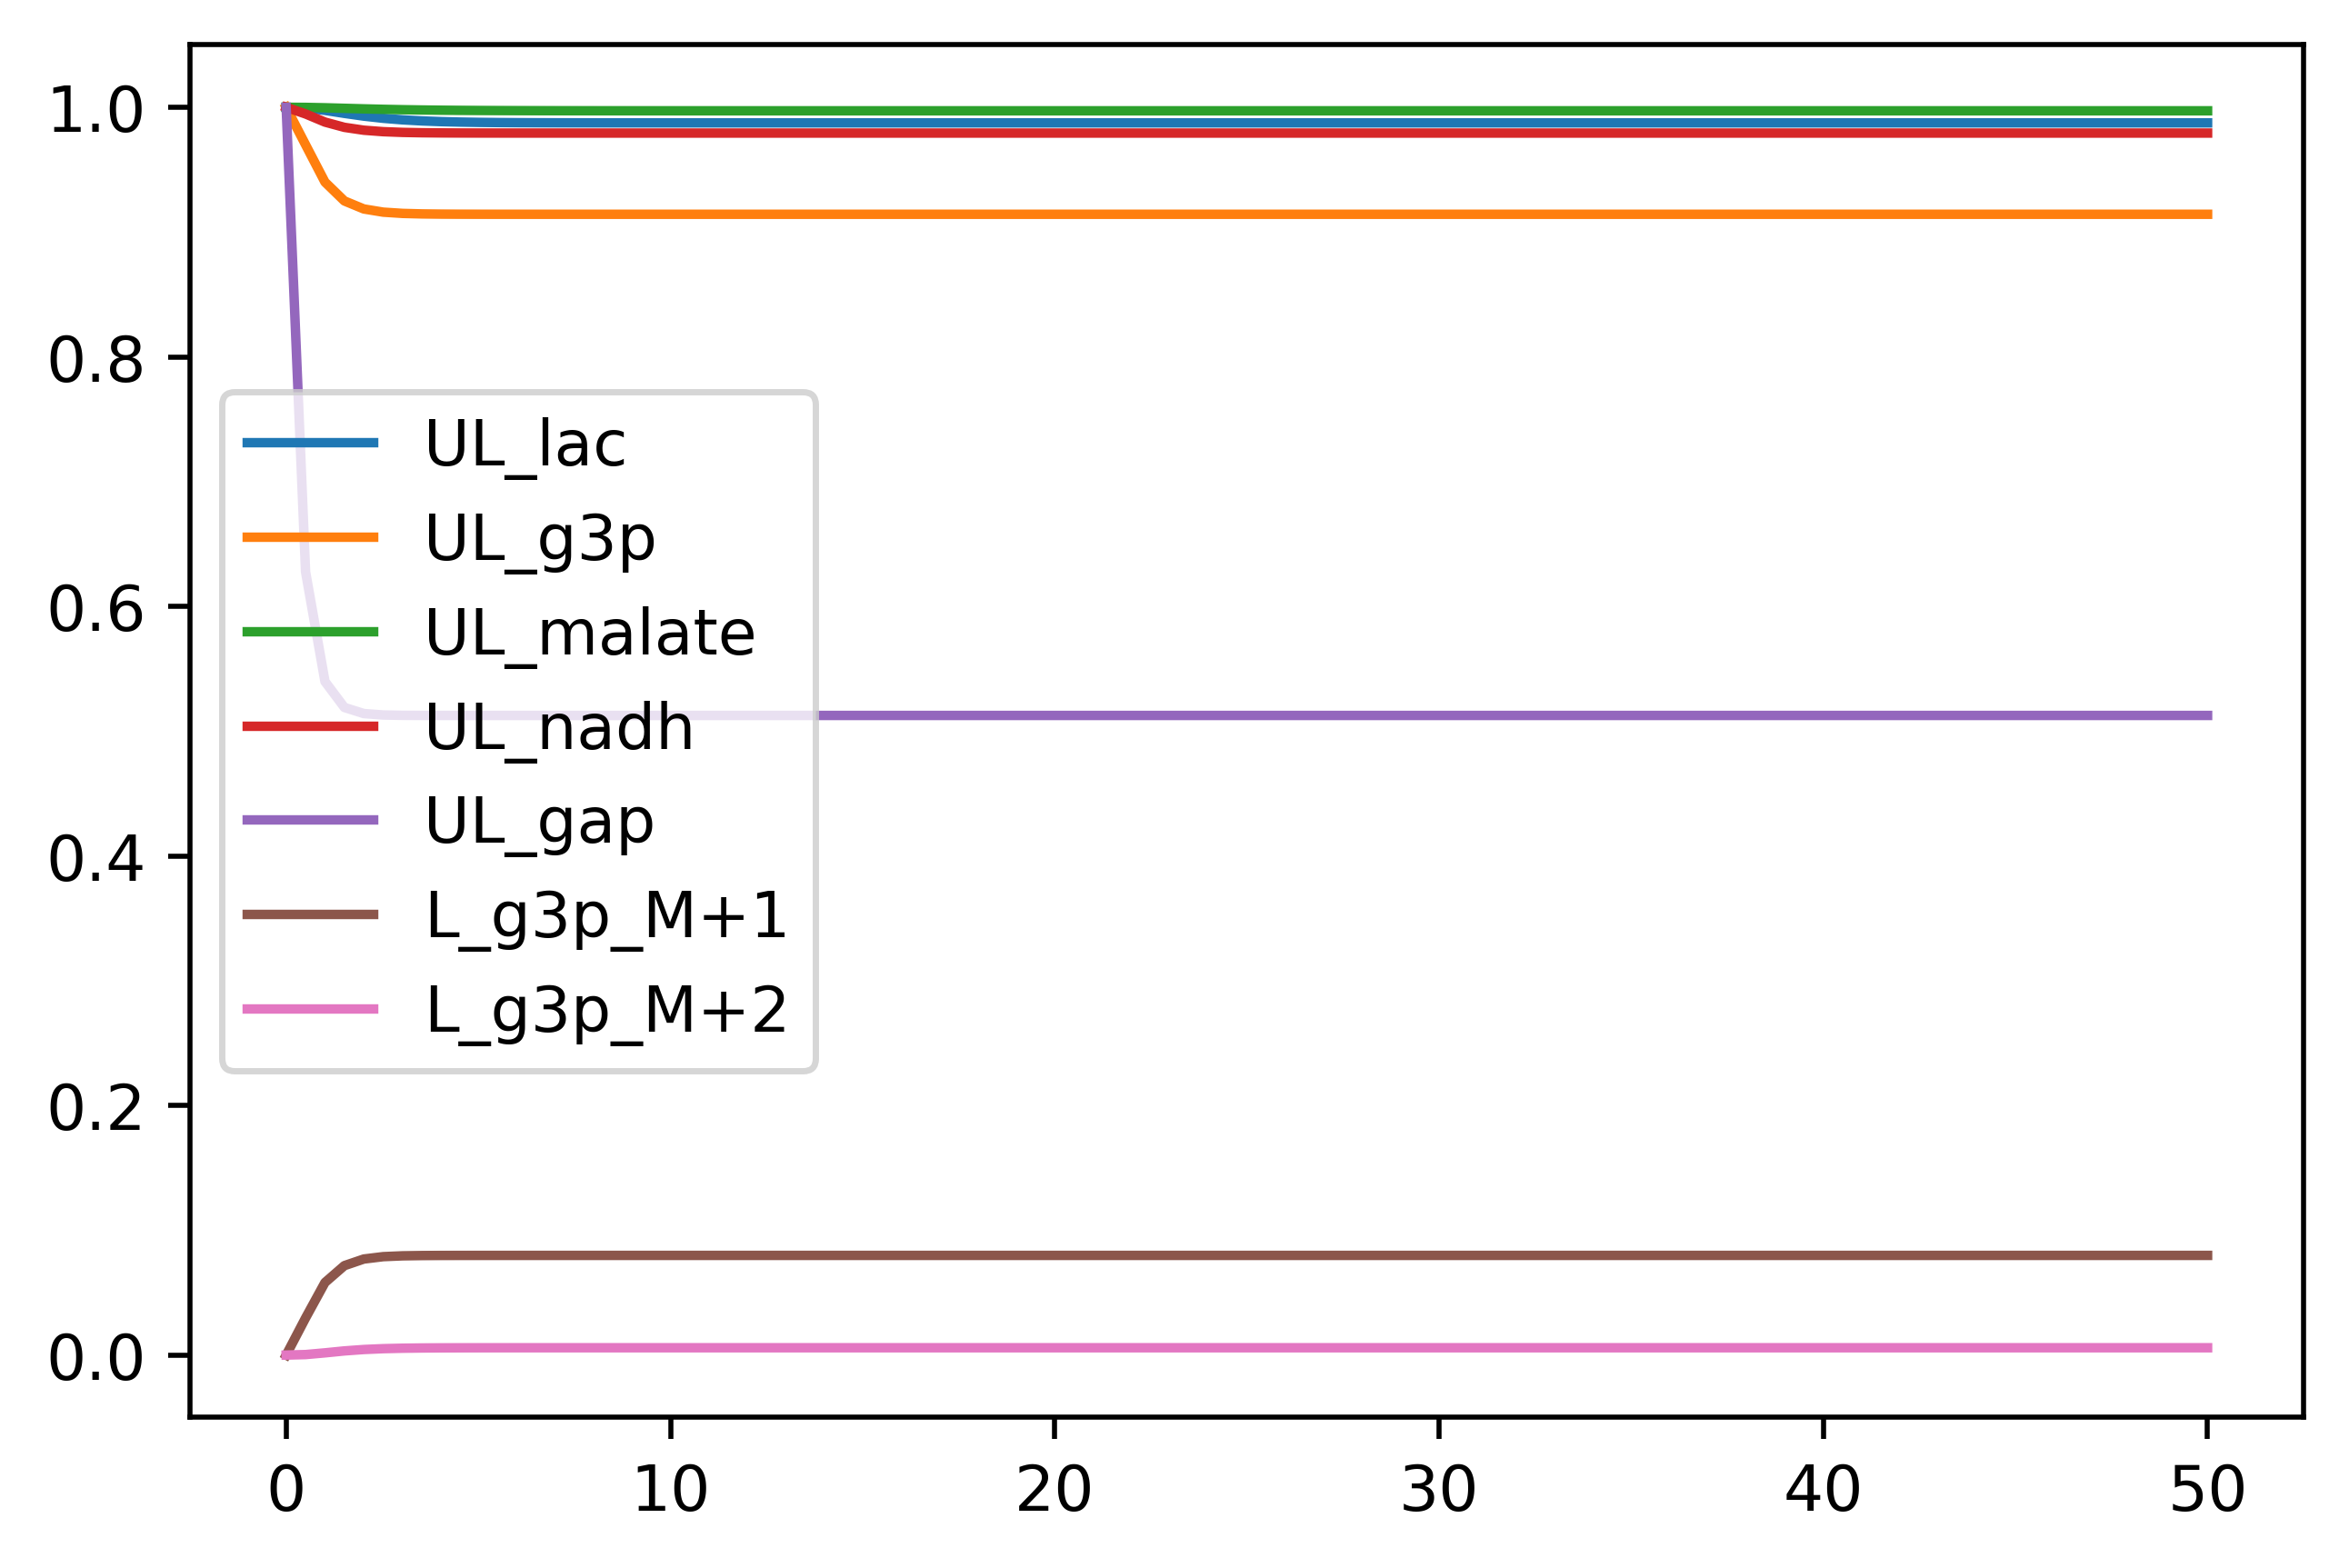

In [5]:
for col in ["UL_lac","UL_g3p","UL_malate","UL_nadh","UL_gap","L_g3p_M+1","L_g3p_M+2"]:
    plt.plot(ts,data[col],label=col)
plt.legend()
print(c0s)
print(lacE,glycolysis)
print(fluxes)
print(conc)

In [6]:
fluxes_inferred,C0s_inferred,df,conc,error = findFlux(data, ts, conc, lacE, glycolysis,vhvds, np.array([0,0,0,0]))
print(fluxes_inferred)
print(C0s_inferred)
print(conc)
print(error)
print(vhvds)
df

../src\flux_finding_mp.py:245: RuntimeWarning: divide by zero encountered in double_scalars
  weights = [np.min([1,1/np.std(data["UL_gap"].values[tMapper[t[x]]])]) for x in range(len(t))]
../src\flux_finding_mp.py:290: RuntimeWarning: divide by zero encountered in double_scalars
  weights = np.array([[np.min([1,1/np.std(data[lab].values[tMapper[t[x]]])]) for x in range(len(t))] for lab in ["UL_lac","UL_g3p","UL_malate"]]).transpose()
../src\flux_finding_mp.py:200: RuntimeWarning: invalid value encountered in double_scalars
  nadh = lambda z:state[3]/concs["NADH"]
../src\flux_finding_mp.py:154: RuntimeWarning: invalid value encountered in double_scalars
  return unlabeled_flux + vh * gap(t) - (unlabeled_flux+ct * vh) * state / conc
../src\flux_finding_mp.py:213: RuntimeWarning: invalid value encountered in true_divide
  result[:,x] = sol[:,x]/concs[labels[x]]


ISS NADH labeling:  0.020653401209212687
[0.25450695 0.04883252 0.32746596 0.44166607]
[0.44396371 0.81973011 0.57342486 0.42824064]
{'Lactate': 0.41543095304490785, 'G3P': 0.02898165938687125, 'Malate': 0.9820274845981977, 'NADH': 0.25012869080753863}
[2.35619431e-08 9.18213284e-08 1.65258826e-07 0.00000000e+00]
{'vhvd_nadh_ldh': 1.1461652571800935, 'vhvd_nadh_mas': 4.709590608729503, 'vhvd_gap_gapdh': 24.56421560434773, 'vhvd_nadh_g3ps': 2.5176584703924934, 'vhvd_dhap_g3ps': 4.289411807437541, 'vhvd_nadh_dhap_g3ps': 1.1880142794414201}


,UL_lac,UL_g3p,UL_malate,UL_nadh,UL_gap,L_lac,L_malate,L_nadh,L_gap,L_g3p_M+1,L_g3p_M+2,L_g3p
0,1.000000,1.000000,1.000000,1.000000,0.999999,0.000000,0.000000,0.000000,8.349470e-07,0.000000,0.000000,0.000000
1,0.999431,0.970107,0.999921,0.994076,0.627696,0.000569,0.000079,0.005924,3.723040e-01,0.029742,0.000401,0.029893
2,0.997500,0.940081,0.999634,0.987233,0.539784,0.002500,0.000366,0.012767,4.602159e-01,0.058162,0.001782,0.059919
3,0.995092,0.924832,0.999243,0.983122,0.519025,0.004908,0.000757,0.016878,4.809746e-01,0.071675,0.003338,0.075168
4,0.992914,0.918365,0.998849,0.981056,0.514124,0.007086,0.001151,0.018944,4.858763e-01,0.076974,0.004463,0.081635
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.987498,0.914258,0.997184,0.979347,0.512608,0.012502,0.002816,0.020653,4.873916e-01,0.079882,0.005865,0.085742
96,0.987498,0.914258,0.997184,0.979347,0.512608,0.012502,0.002816,0.020653,4.873916e-01,0.079882,0.005865,0.085742
97,0.987498,0.914258,0.997184,0.979347,0.512608,0.012502,0.002816,0.020653,4.873916e-01,0.079882,0.005865,0.085742
98,0.987498,0.914258,0.997184,0.979347,0.512608,0.012502,0.002816,0.020653,4.873916e-01,0.079882,0.005865,0.085742


In [7]:
dhap_params = fitSource(ts, data["UL_gap"])
dhap = lambda x: exponetialCurve(x,dhap_params)

    
firstT = np.min(ts)
firstT = [x for x in range(len(ts)) if abs(firstT-ts[x]) < 1e-5]
initialState = [np.mean(data.loc[firstT,label])*c for label,c in zip(["UL_lac","UL_g3p","UL_malate","UL_nadh"],[conc["Lactate"],conc["G3P"],conc["Malate"],conc["NADH"]])]


nadh = interp1d(ts,
                integrateModel(nadhEquation,ts,(fluxes_inferred[3],conc['NADH'],C0s_inferred[3] * fluxes_inferred[3],None,dhap,vhvds),initialState[3],conc["NADH"])[:,0],
                bounds_error=False,fill_value="extrapolate") 


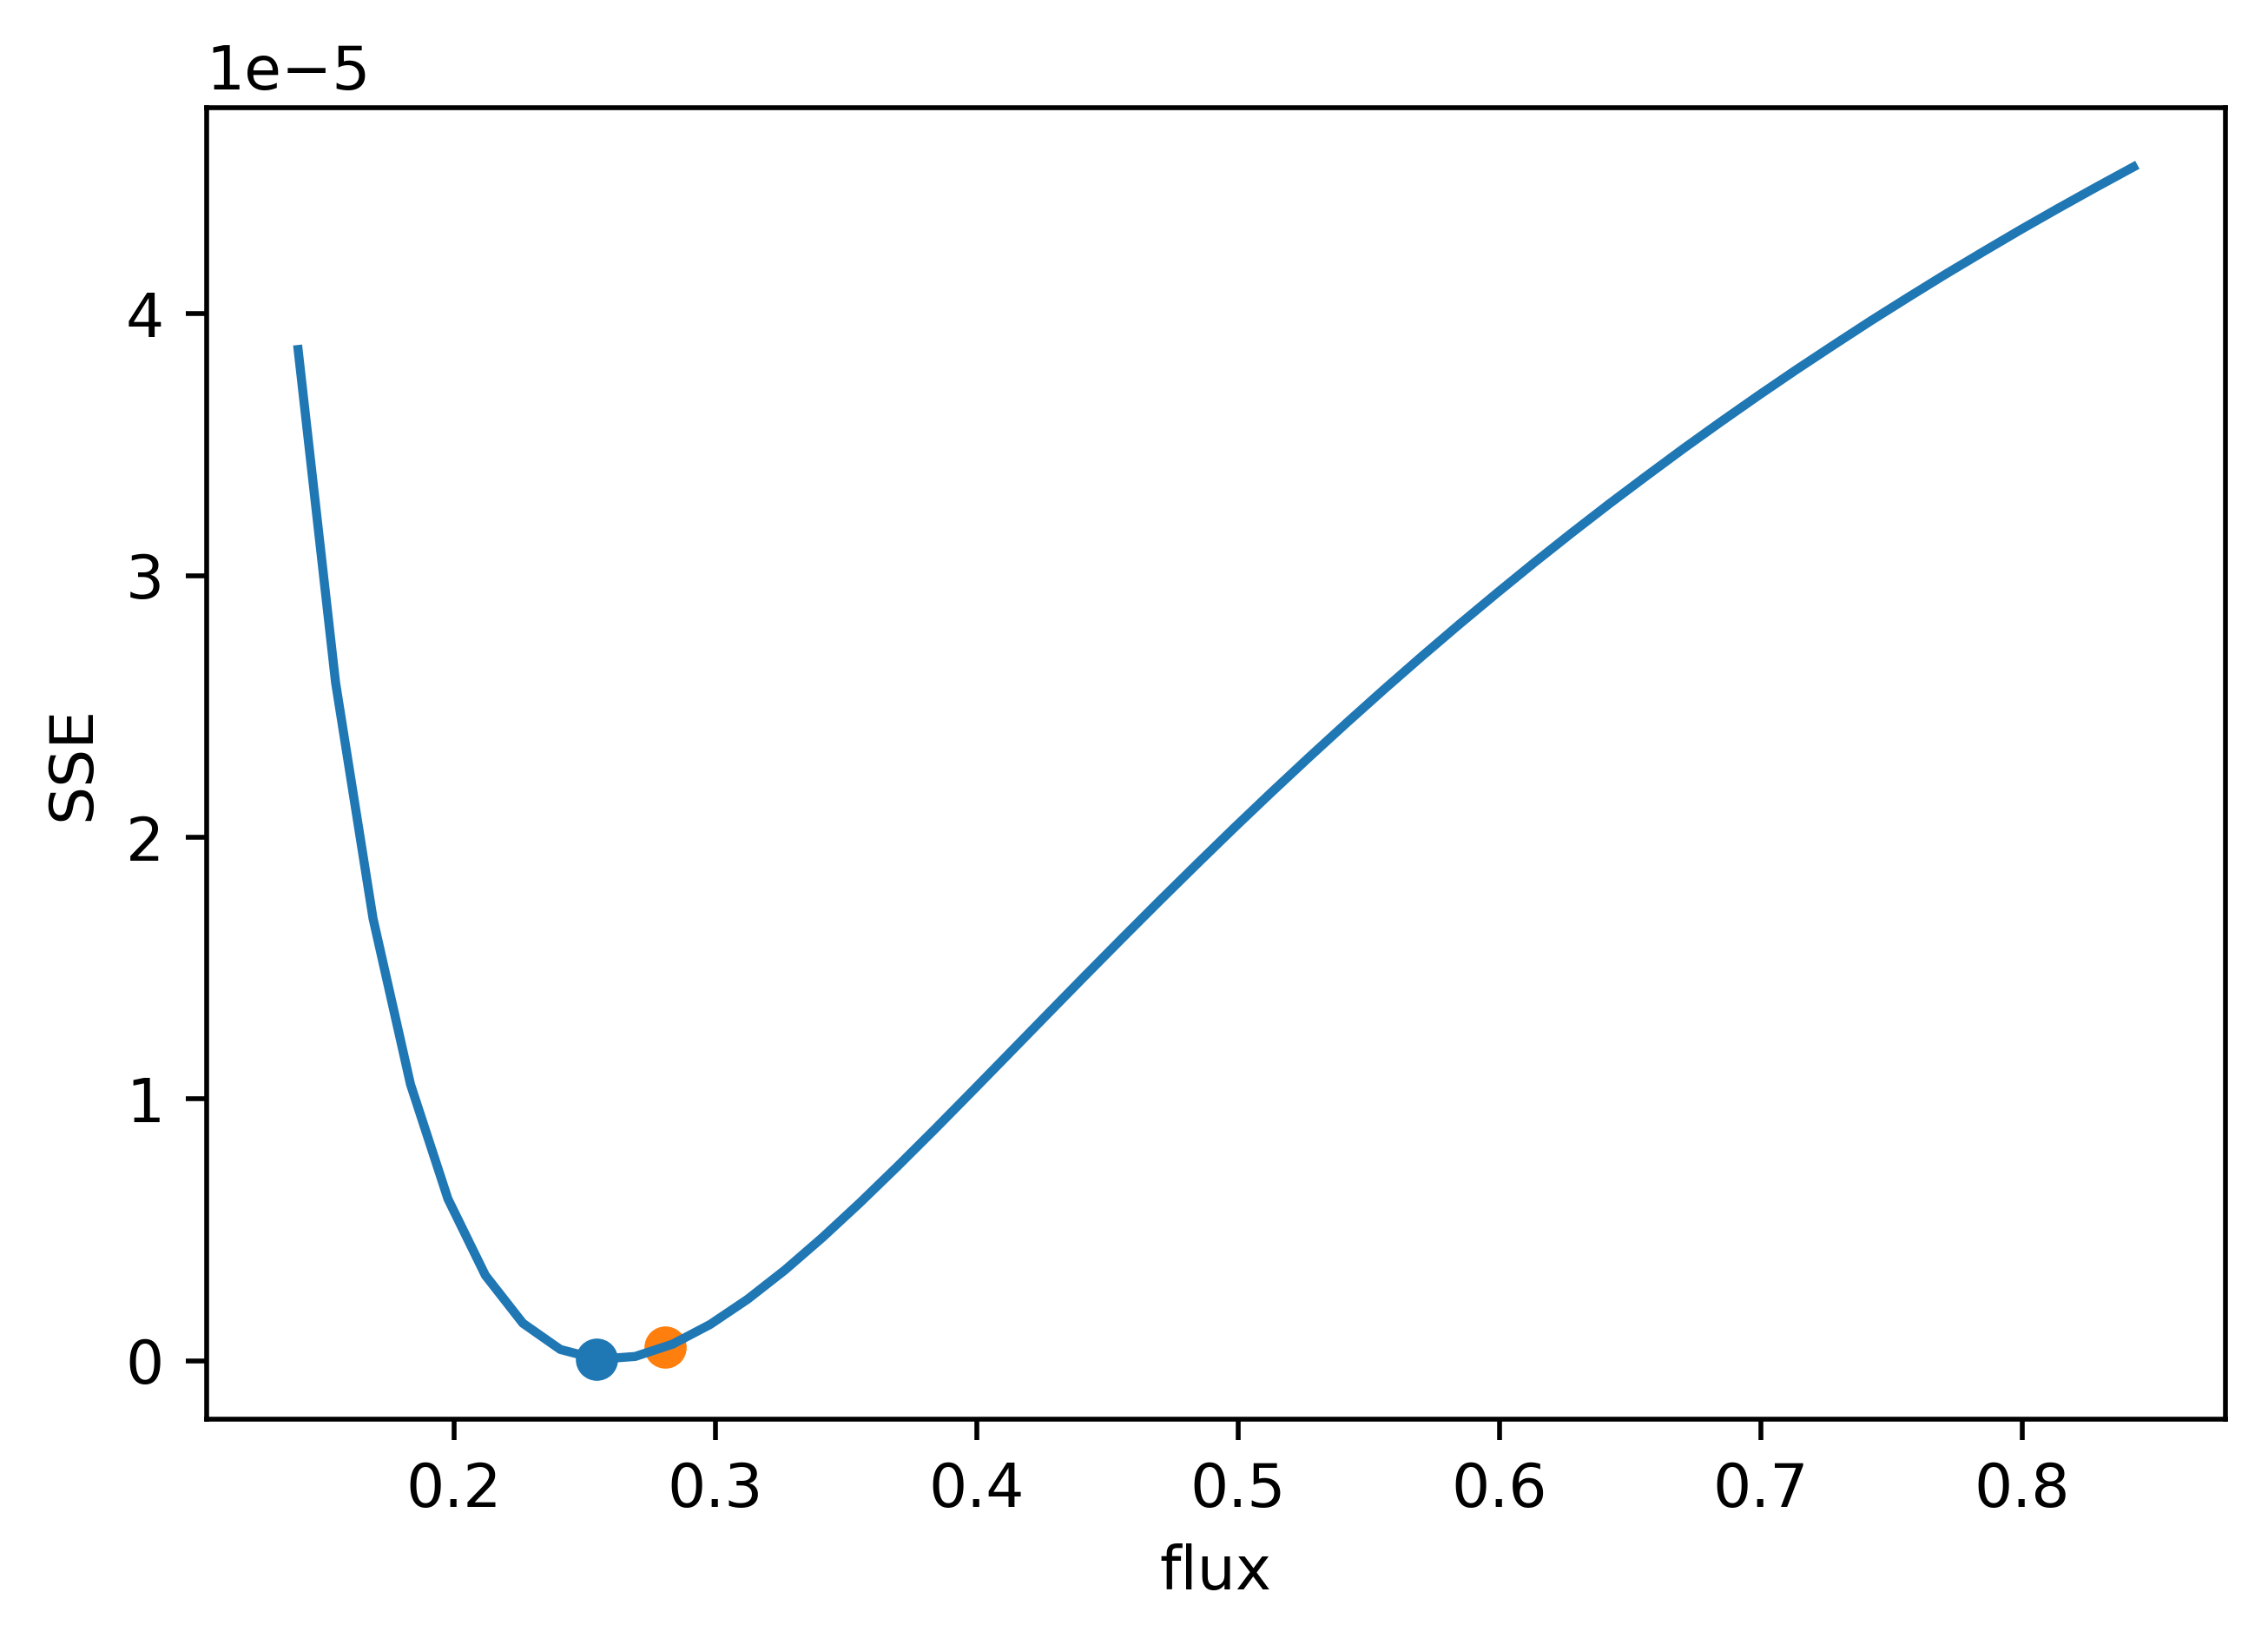

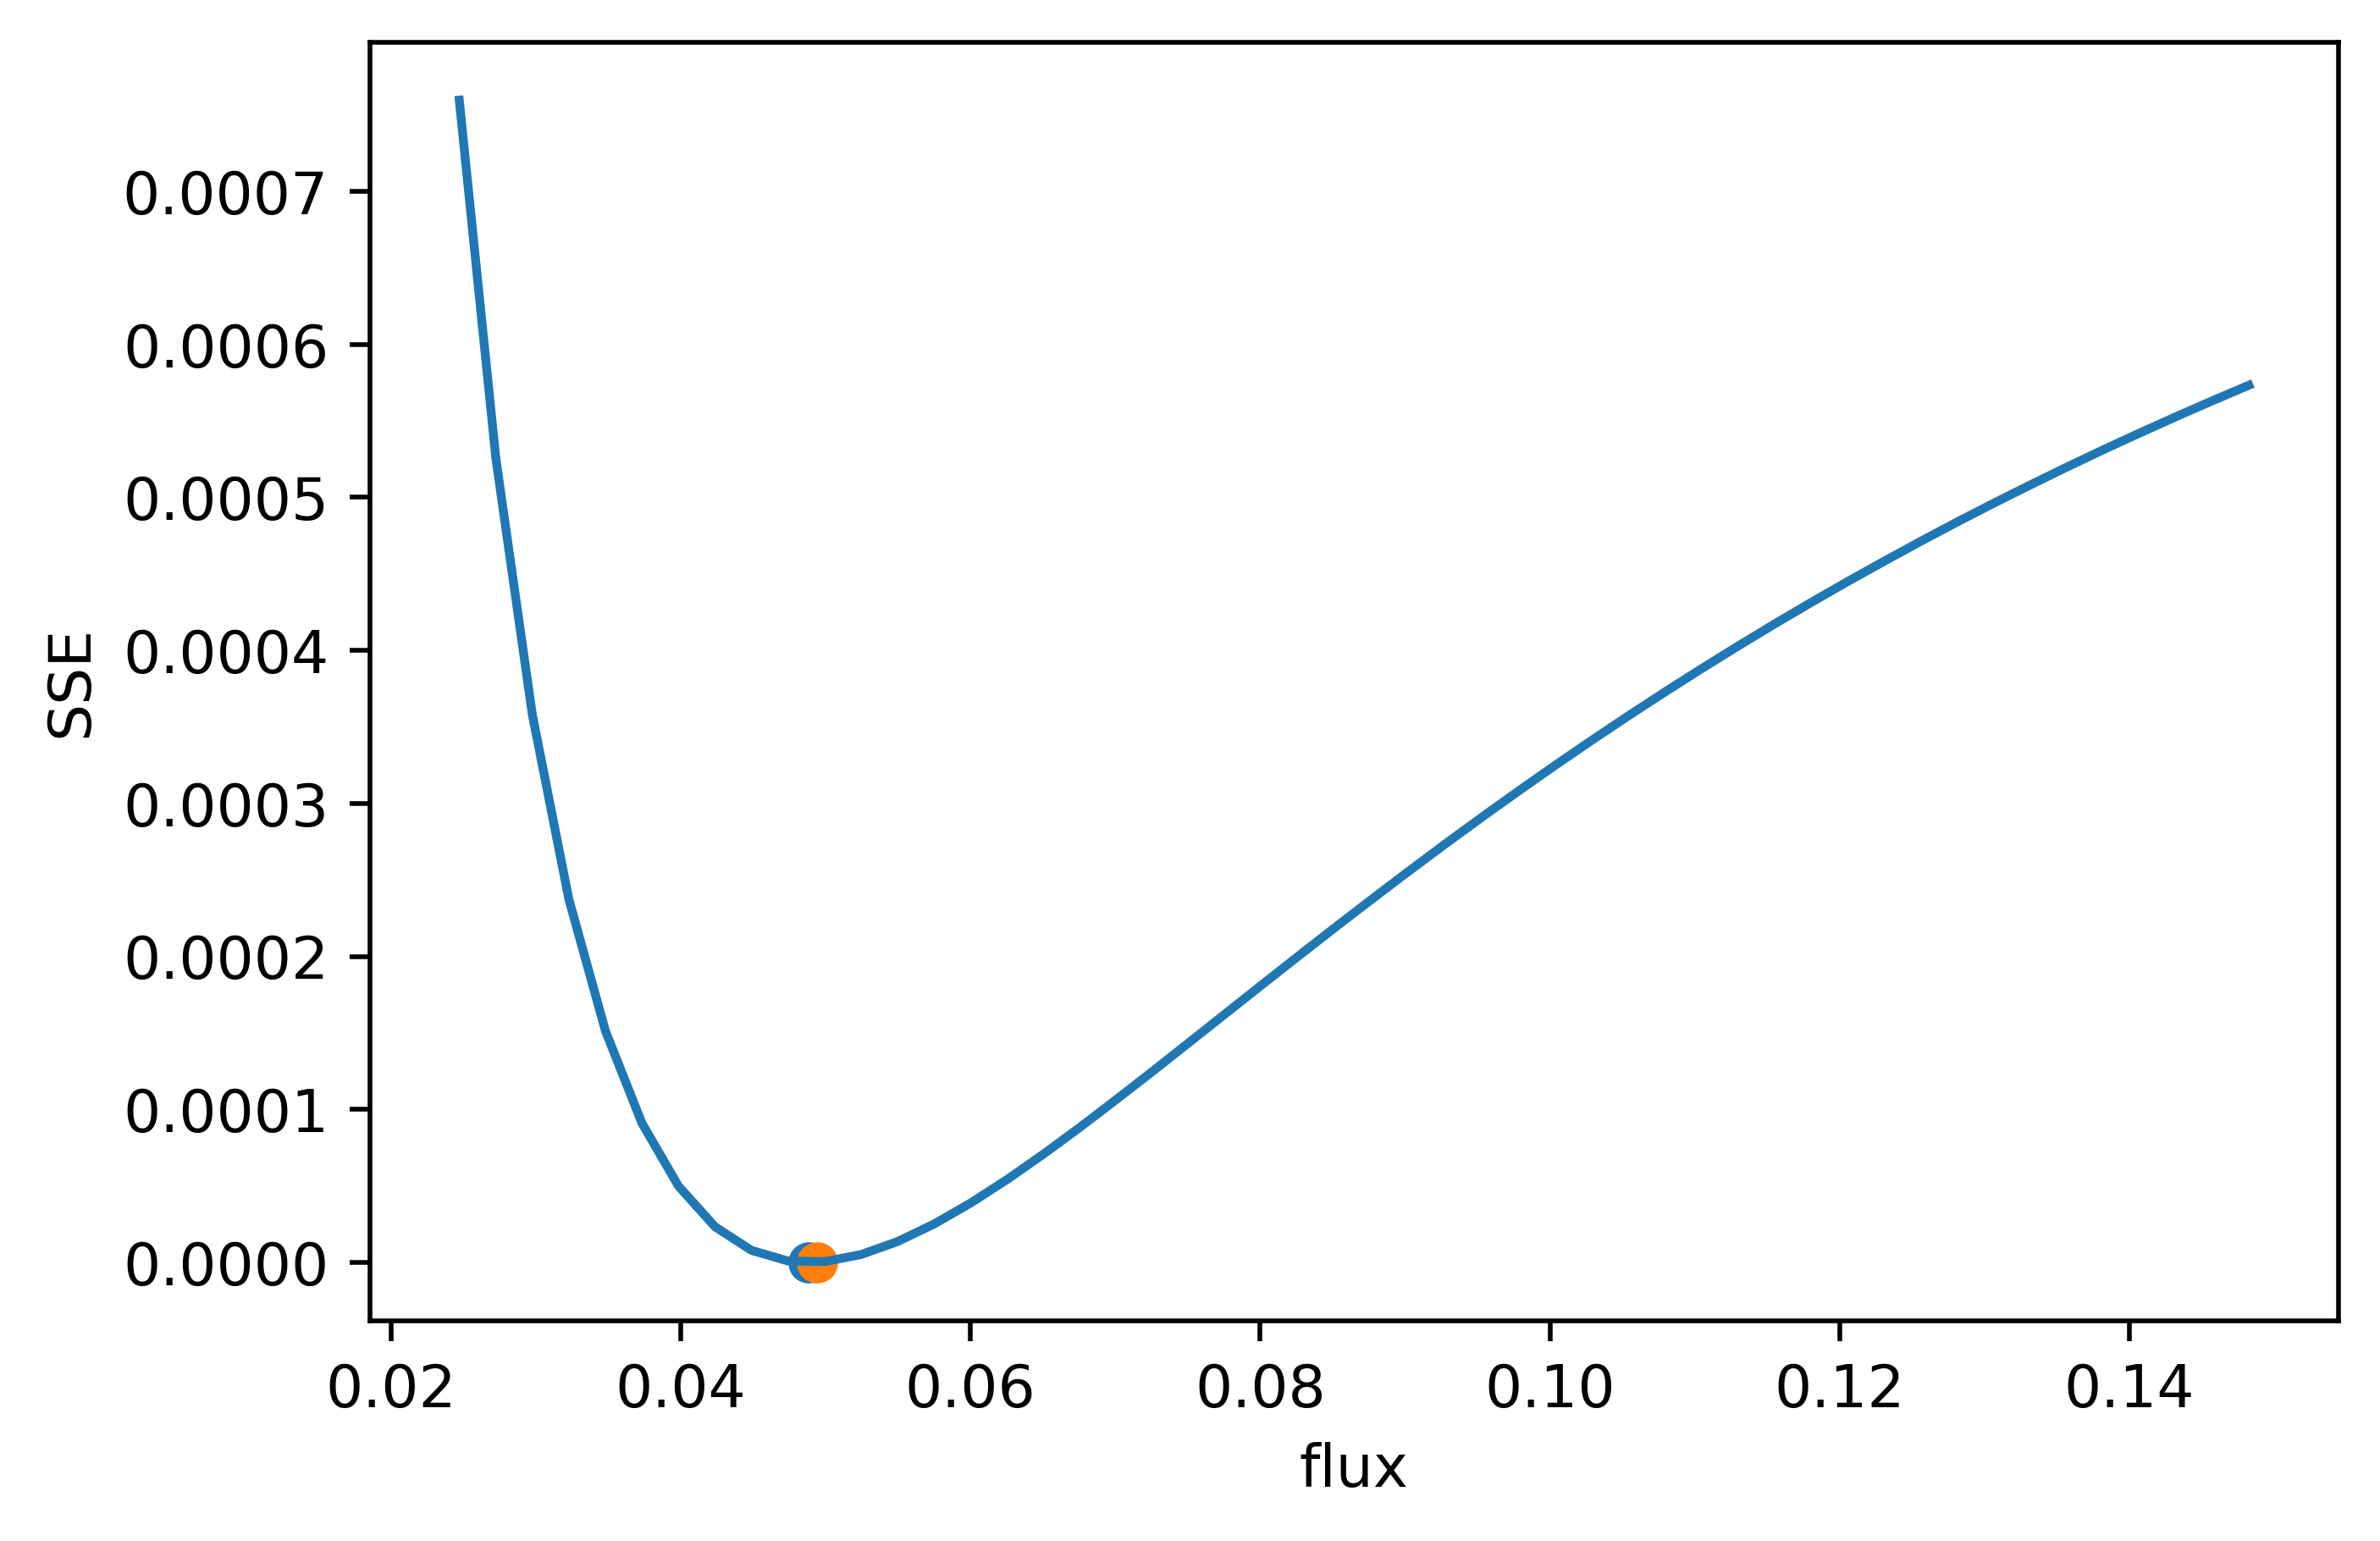

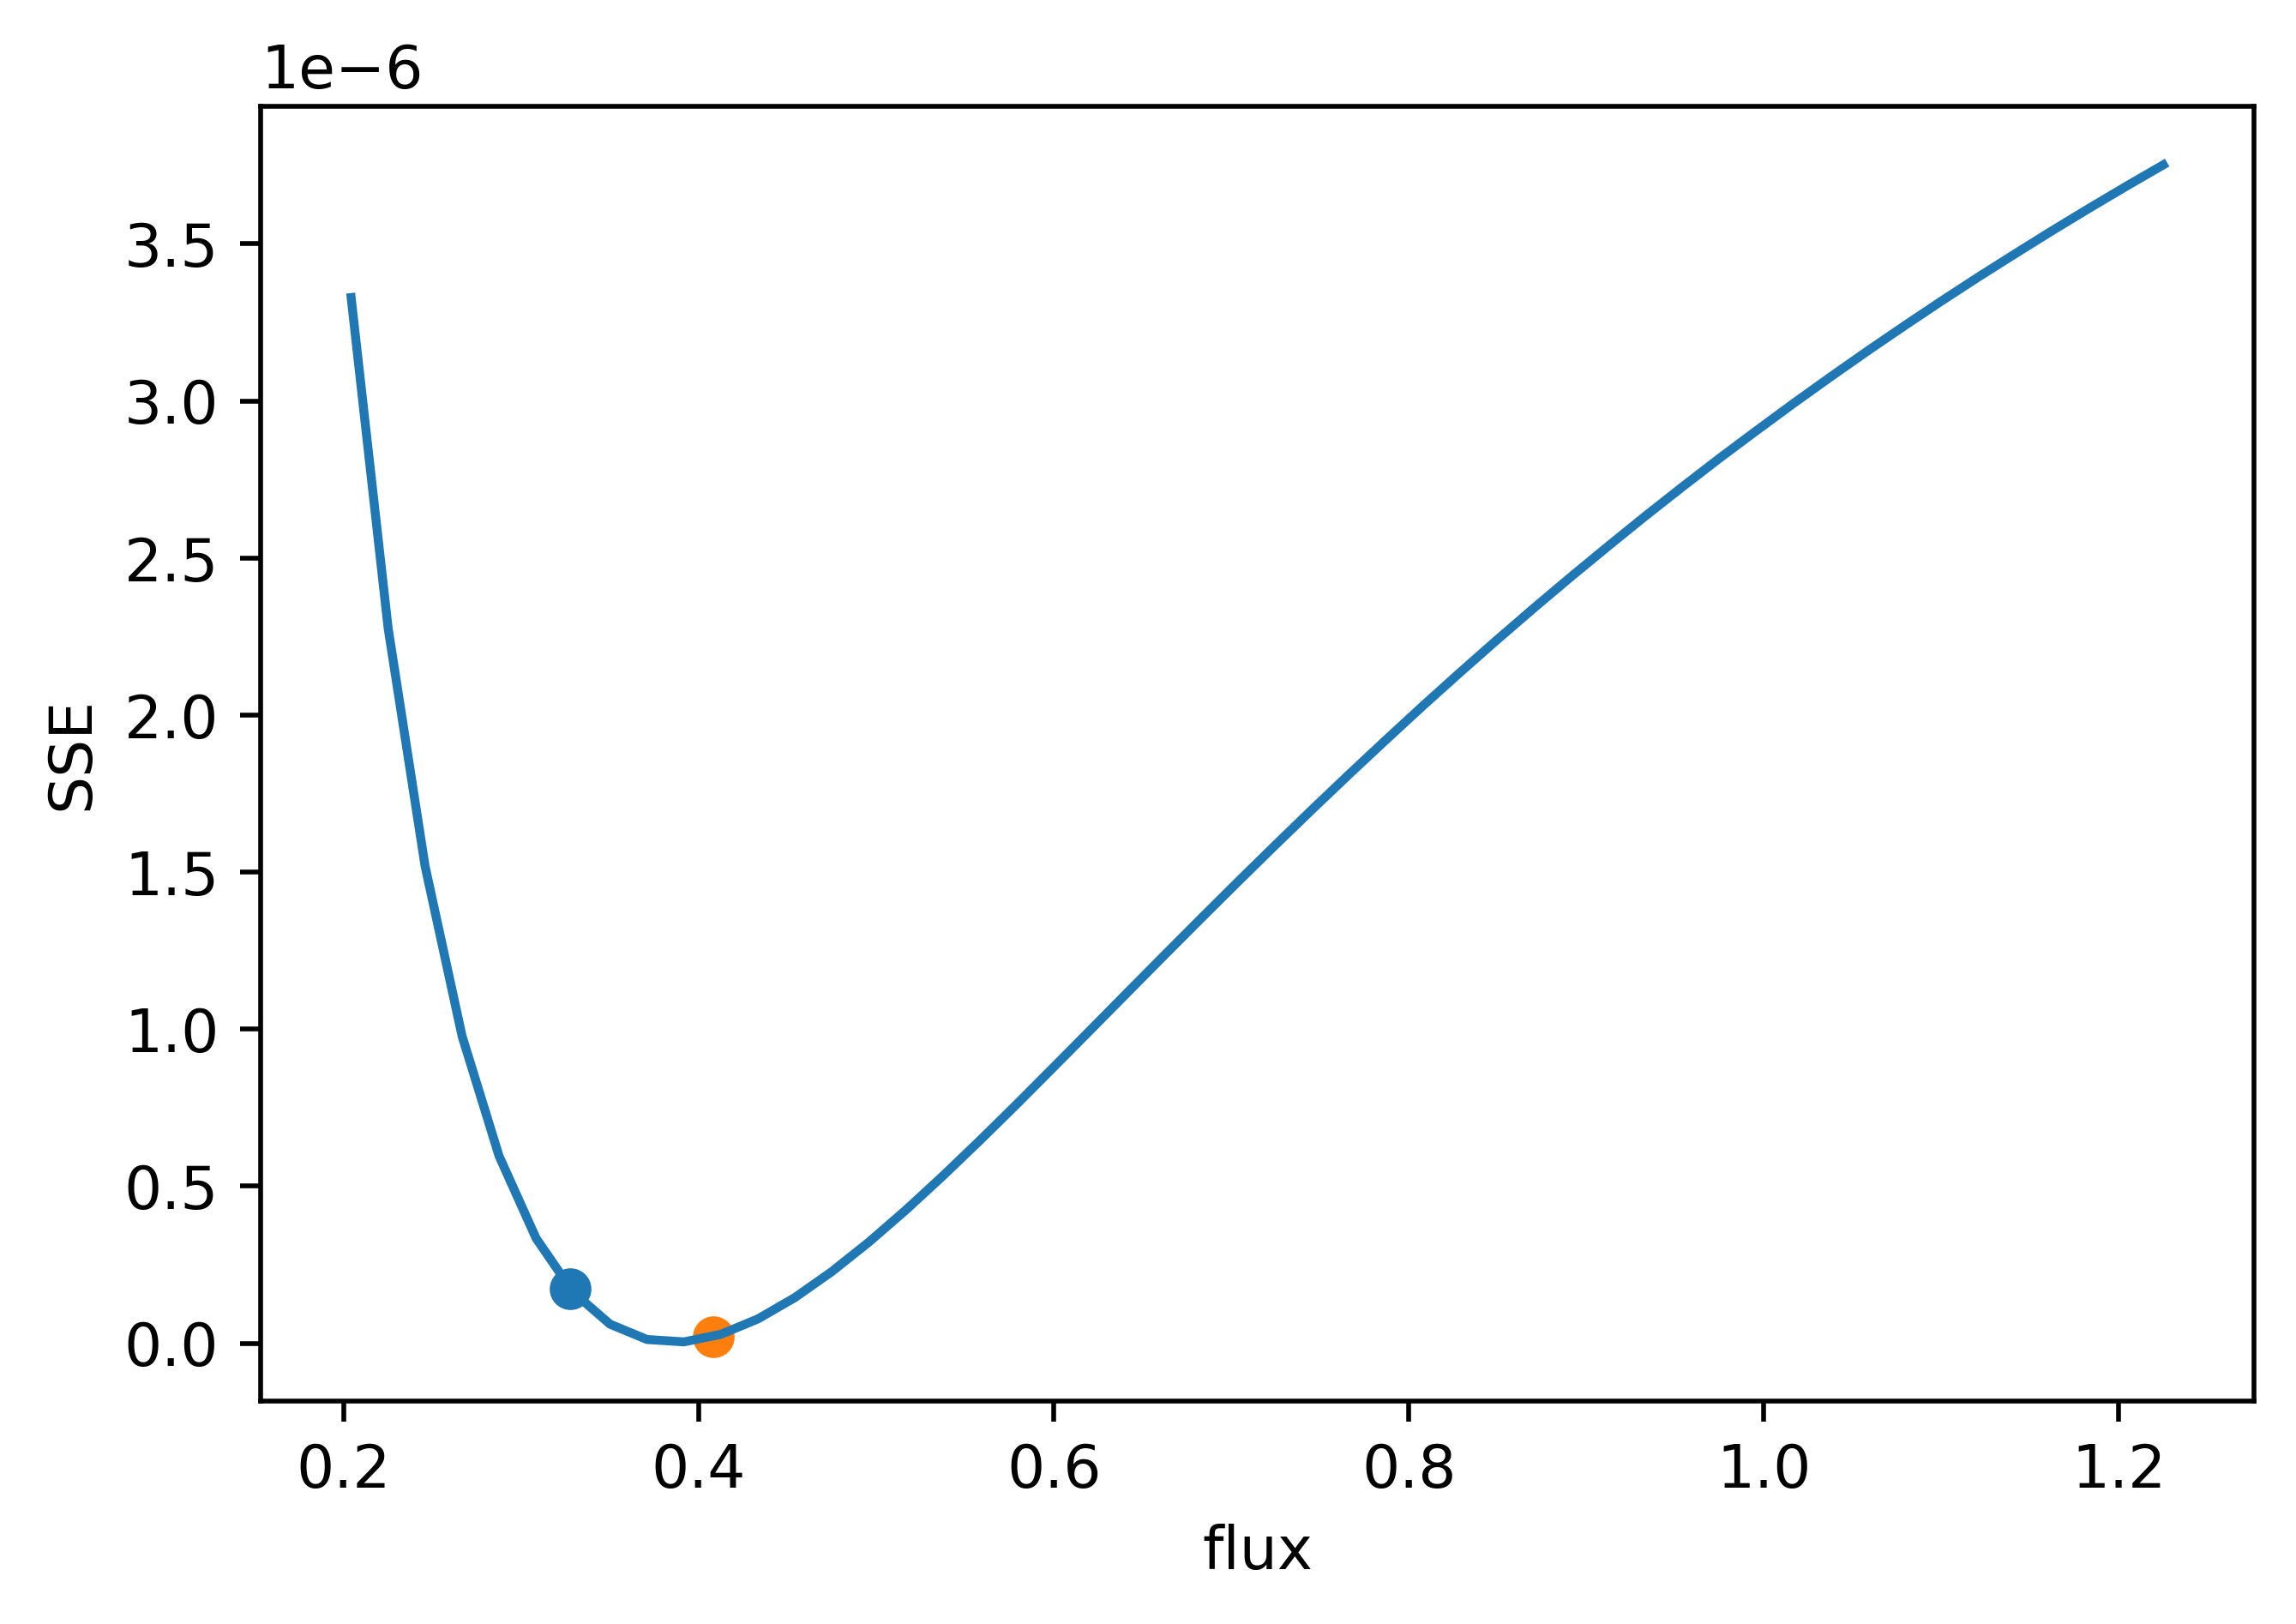

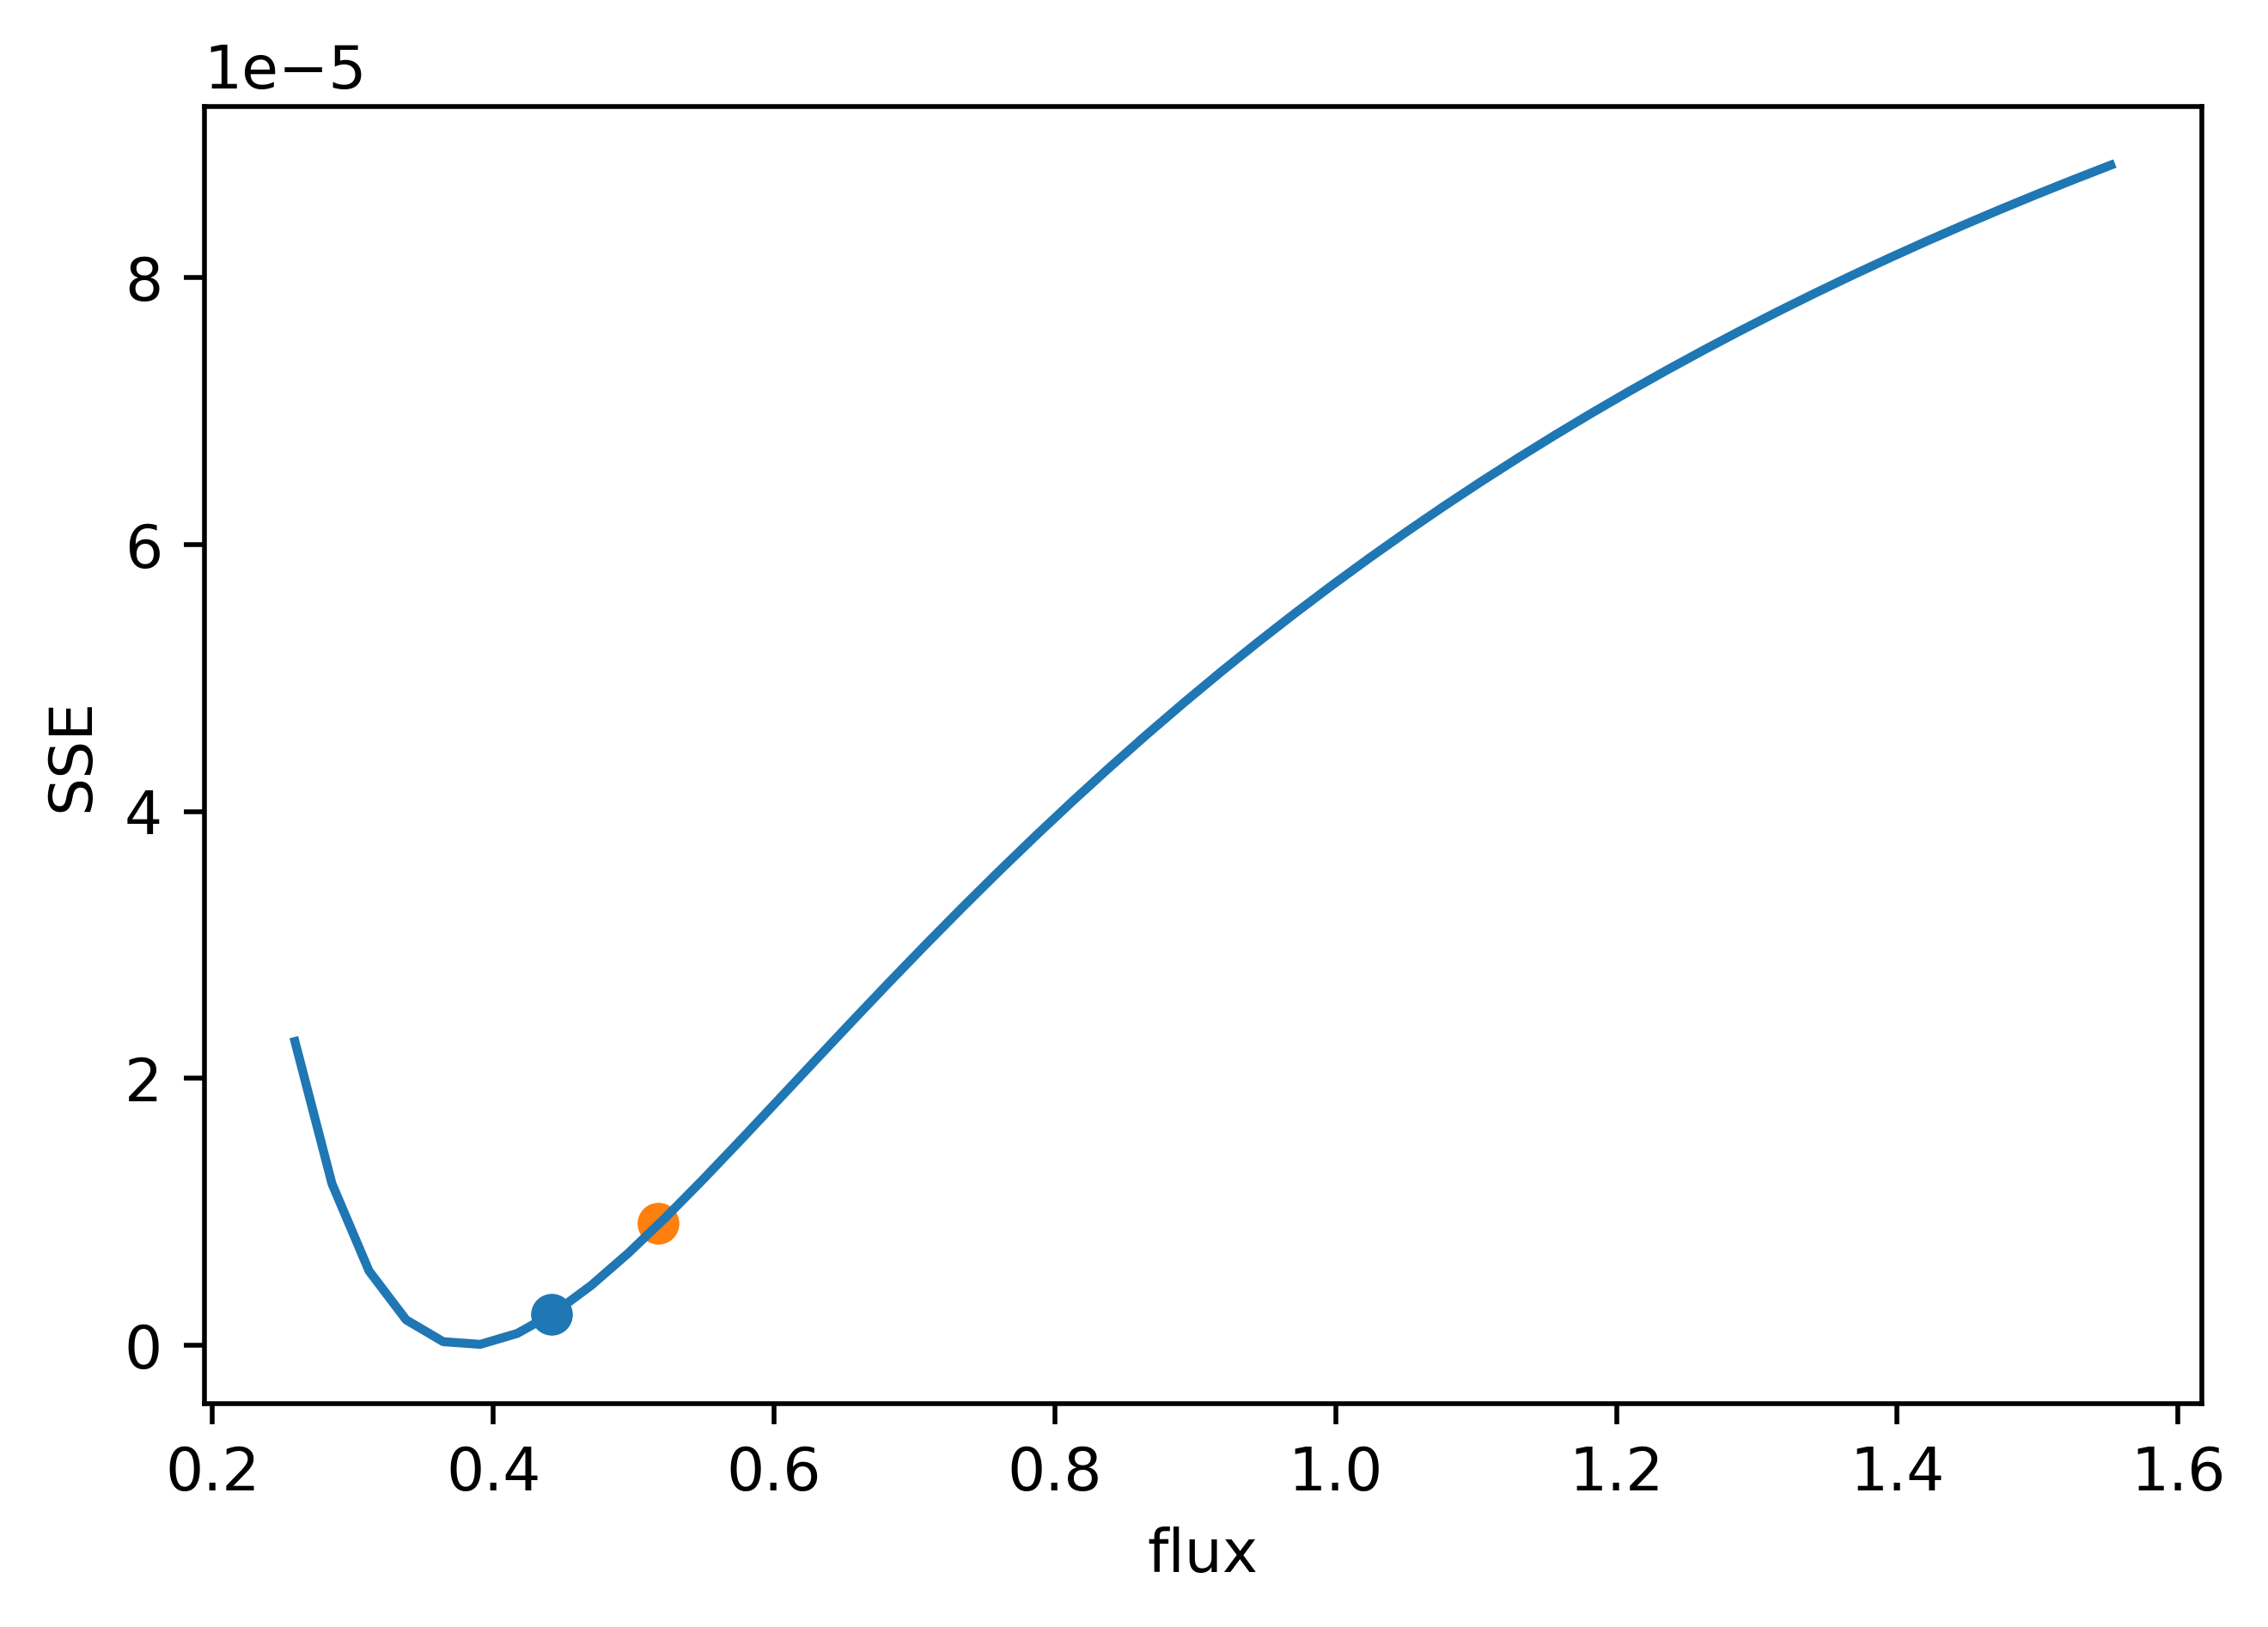

In [8]:
equations = [lactateEquation,g3pEquation,malateEquation,nadhEquation]
labels1 = ["UL_lac","UL_g3p","UL_malate","UL_nadh"]
labels2 = ["Lactate","G3P","Malate","NADH"]
for x in range(4):
    fluxes_to_try = np.linspace(fluxes[x]/2,3*fluxes[x])
    #fluxes_to_try = np.linspace(0.001,2*fluxes_inferred[x])
    errs = []
    for f in fluxes_to_try:
        val = integrateModel(equations[x],ts,(f,conc[labels2[x]],C0s_inferred[x] * f,nadh,dhap,vhvds),initialState[x],conc[labels2[x]])[:,0]
        err = sse(val,data[labels1[x]].values)#np.sum(np.abs(val-data["UL_nadh"].values))
        errs.append(err)
    f = fluxes_inferred[x]
    val = integrateModel(equations[x],ts,(f,conc[labels2[x]],C0s_inferred[x] * f,nadh,dhap,vhvds),initialState[x],conc[labels2[x]])[:,0]
    err = sse(val,data[labels1[x]].values)
    plt.figure()
    plt.plot(fluxes_to_try,errs)
    plt.ylabel("SSE")
    plt.xlabel("flux")
    plt.scatter([f],[err],label="inferred flux")
    
    f = fluxes[x]
    val = integrateModel(equations[x],ts,(f,conc[labels2[x]],c0s[x] * f,nadh,dhap,vhvds),initialState[x],conc[labels2[x]])[:,0]
    err = sse(val,data[labels1[x]].values)
    plt.scatter([f],[err],label="true flux")

#plt.xlim((0,20000))

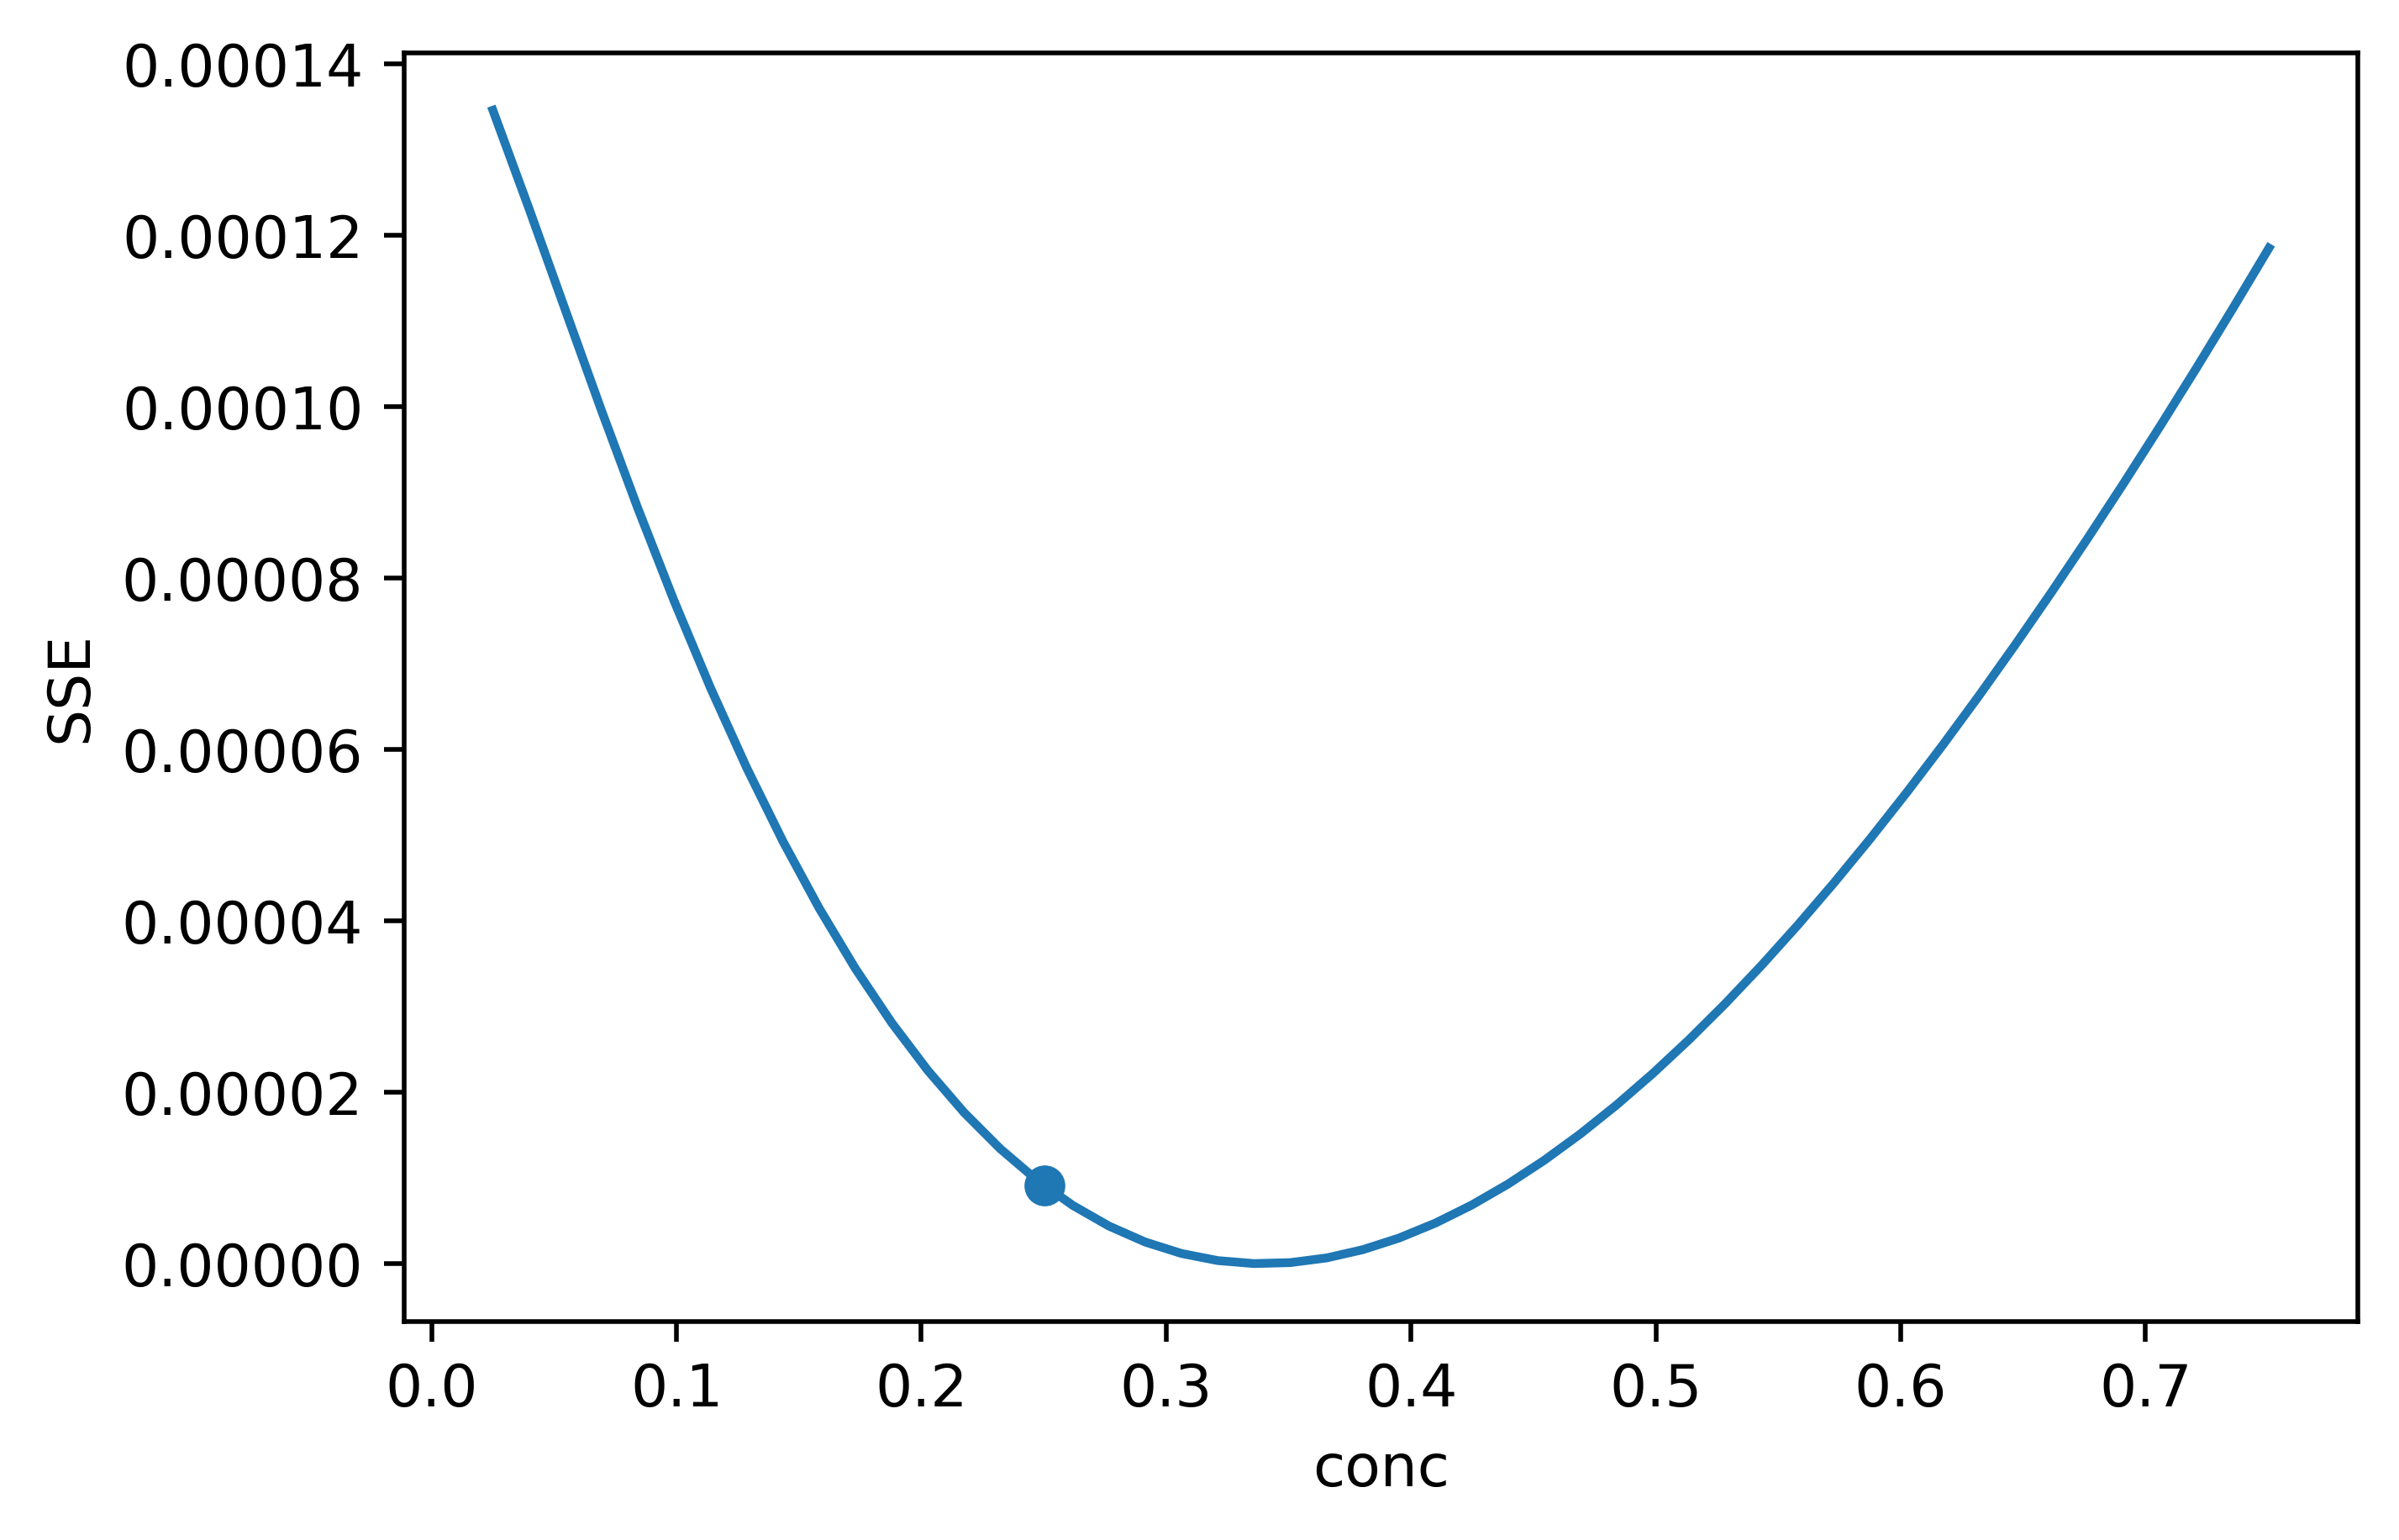

In [9]:
concs_to_try = np.linspace(conc["NADH"]/10,3*conc["NADH"])
errs = []
for c in concs_to_try:
    val = integrateModel(nadhEquation,ts,(fluxes[3],c,c0s[3] * fluxes[3],nadh,dhap,vhvds),c,c)[:,0]
    err = sse(val,data[labels1[x]].values)
    errs.append(err)
c = conc["NADH"]
val = integrateModel(nadhEquation,ts,(fluxes[3],c,c0s[3] * fluxes[3],nadh,dhap,vhvds),c,c)[:,0]
err = sse(val,data[labels1[x]].values)
plt.figure()
plt.plot(concs_to_try,errs)
plt.ylabel("SSE")
plt.xlabel("conc")
plt.scatter([c],[err],label="inferred conc")



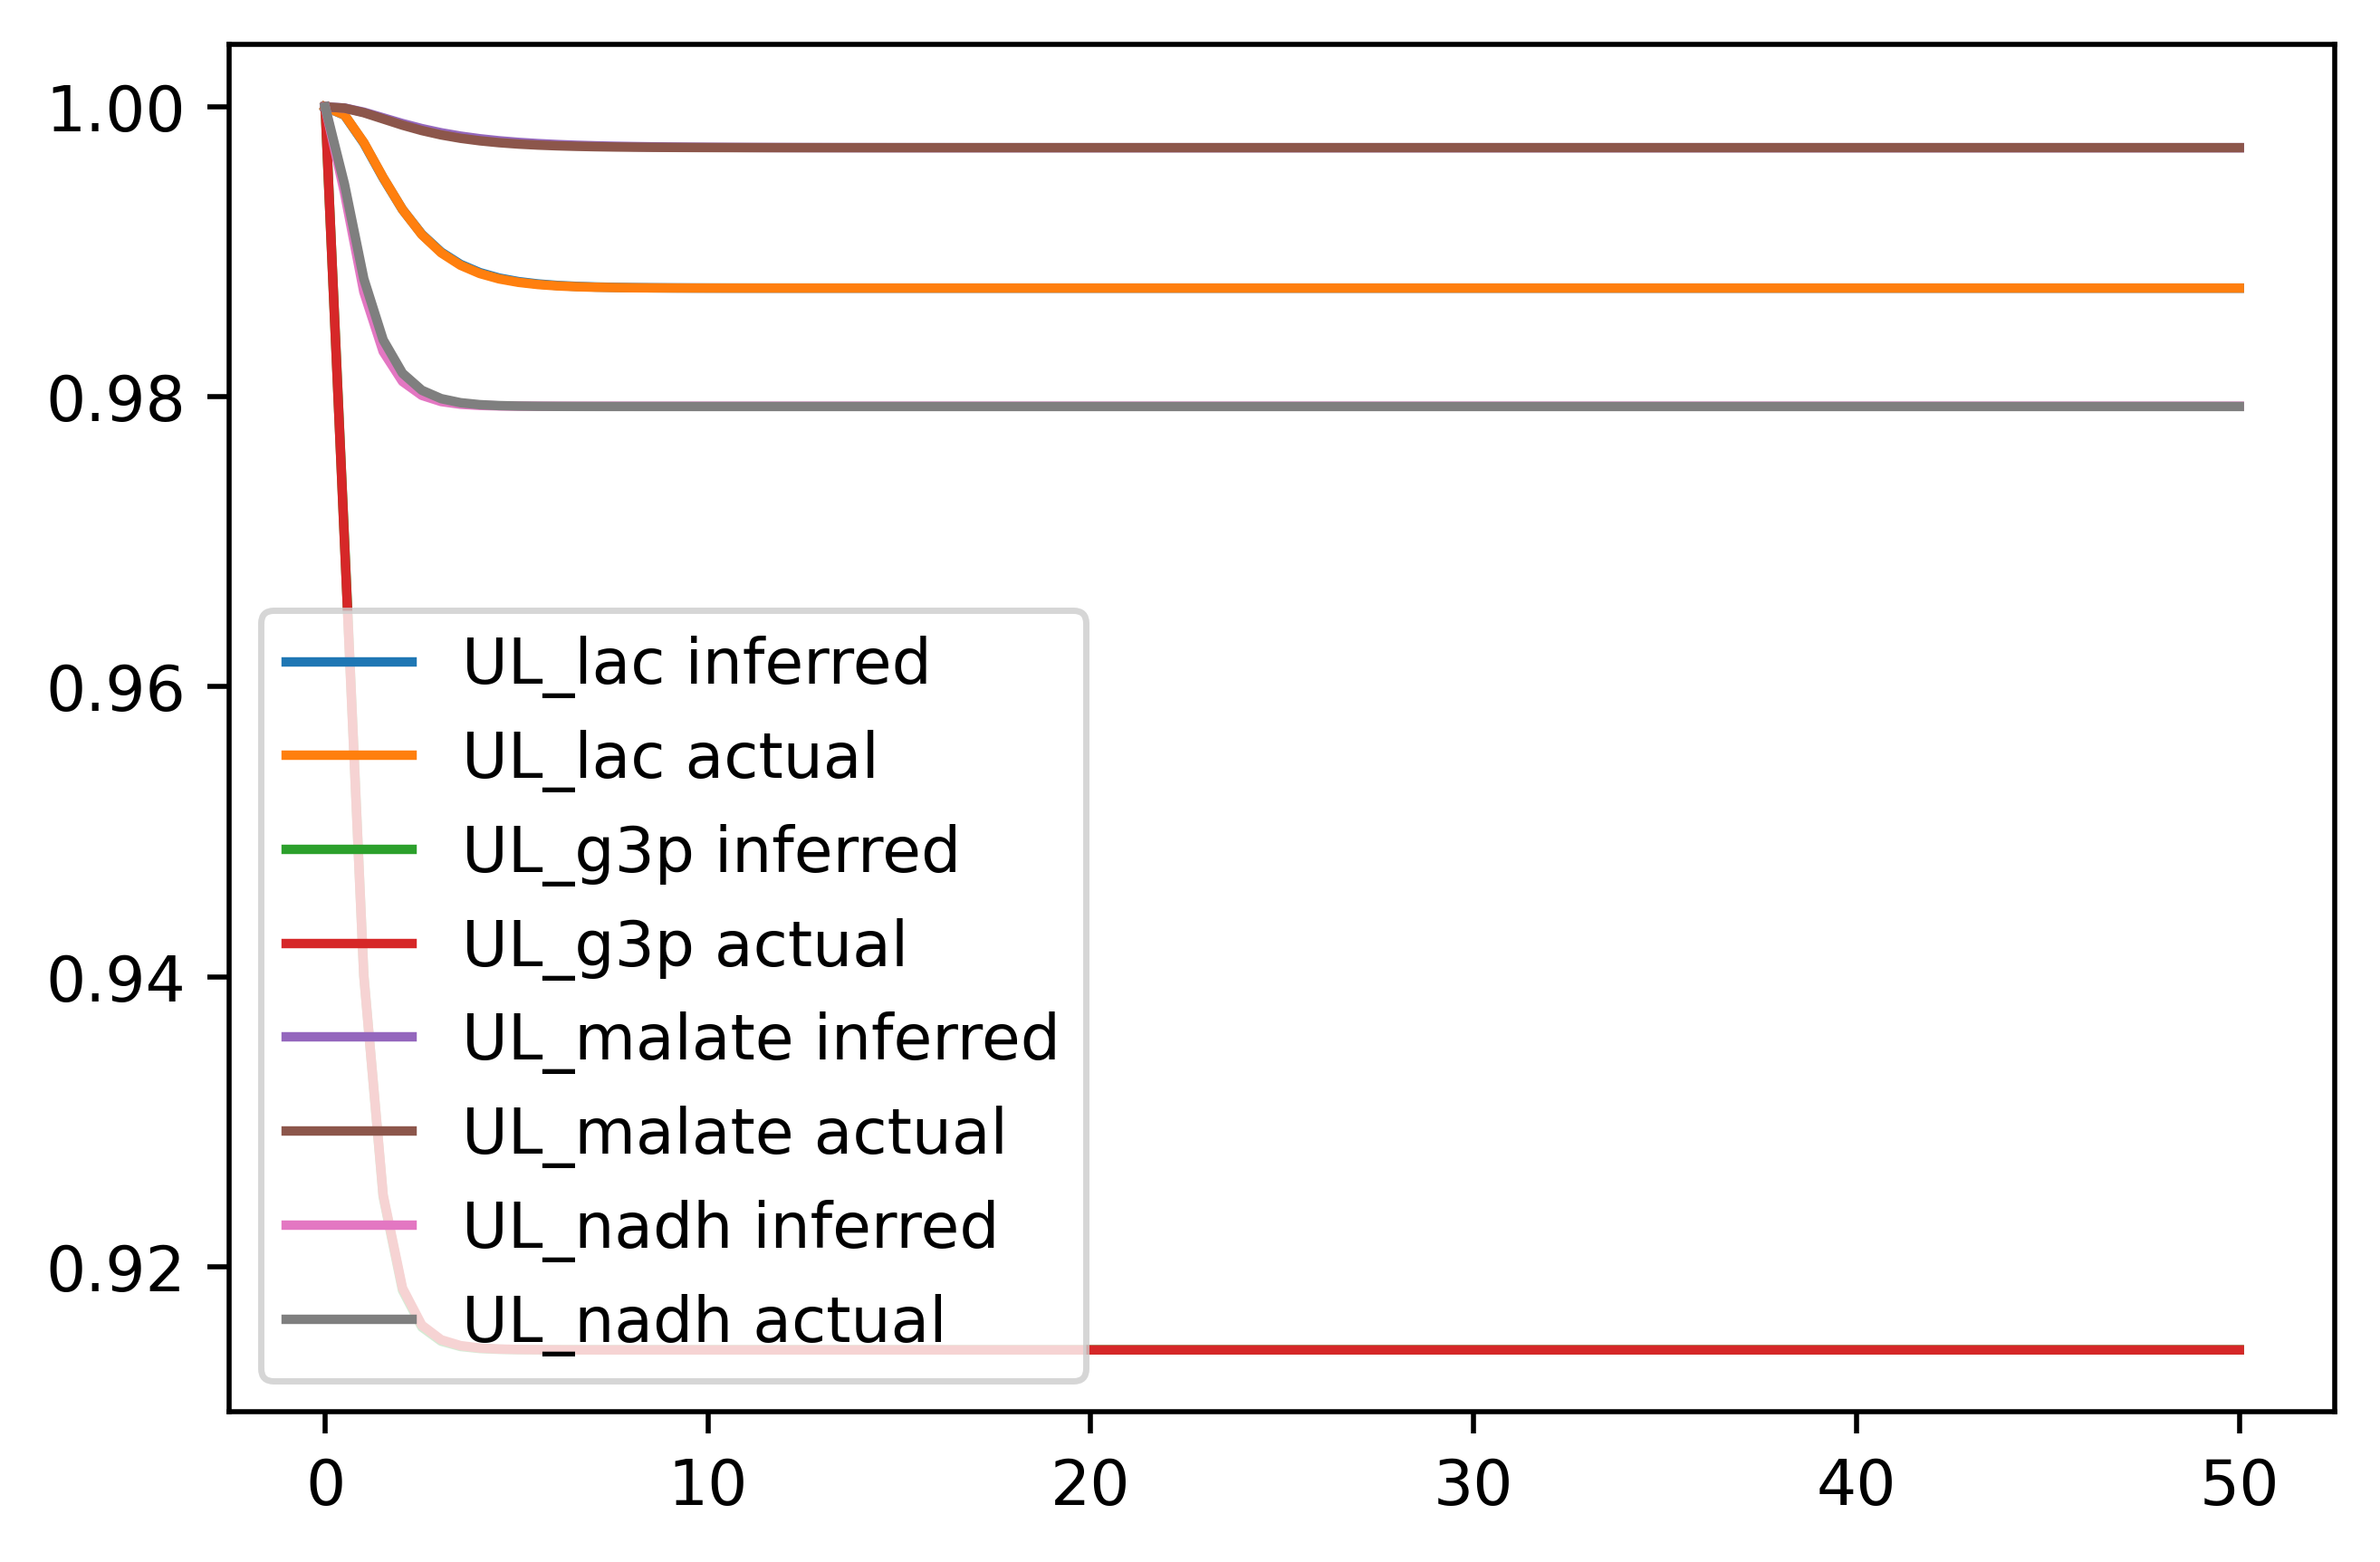

In [10]:
values = integrateLabelingModel(ts, fluxes_inferred,conc,dhap_params,C0s_inferred,vhvds,initialState)
inferred = pd.DataFrame(data=values,columns=["UL_lac","UL_g3p","UL_malate","UL_nadh"])
for col in ["UL_lac","UL_g3p","UL_malate","UL_nadh"]:
    plt.plot(ts,inferred[col],label=col + " inferred")
    plt.plot(ts,data[col],label=col+" actual")
plt.legend()


In [11]:
if __name__ == '__main__':
    true = []
    pred = []
    err = []
    args = [[ts,numBestFitIters] for _ in range(numSims)]
    result = startConcurrentTask(simulateDataAndInferFlux,args,numCores,"running simulations",len(args))
    for fluxes,(inferred_fluxes,_,_,conc,errs) in result:
        true.append(fluxes)
        pred.append(inferred_fluxes)
        err.append(errs)
true = np.array(true)
pred = np.array(pred)
err = np.array(err)

running simulations |██████████████████████████████████████████████████| 100.0% 


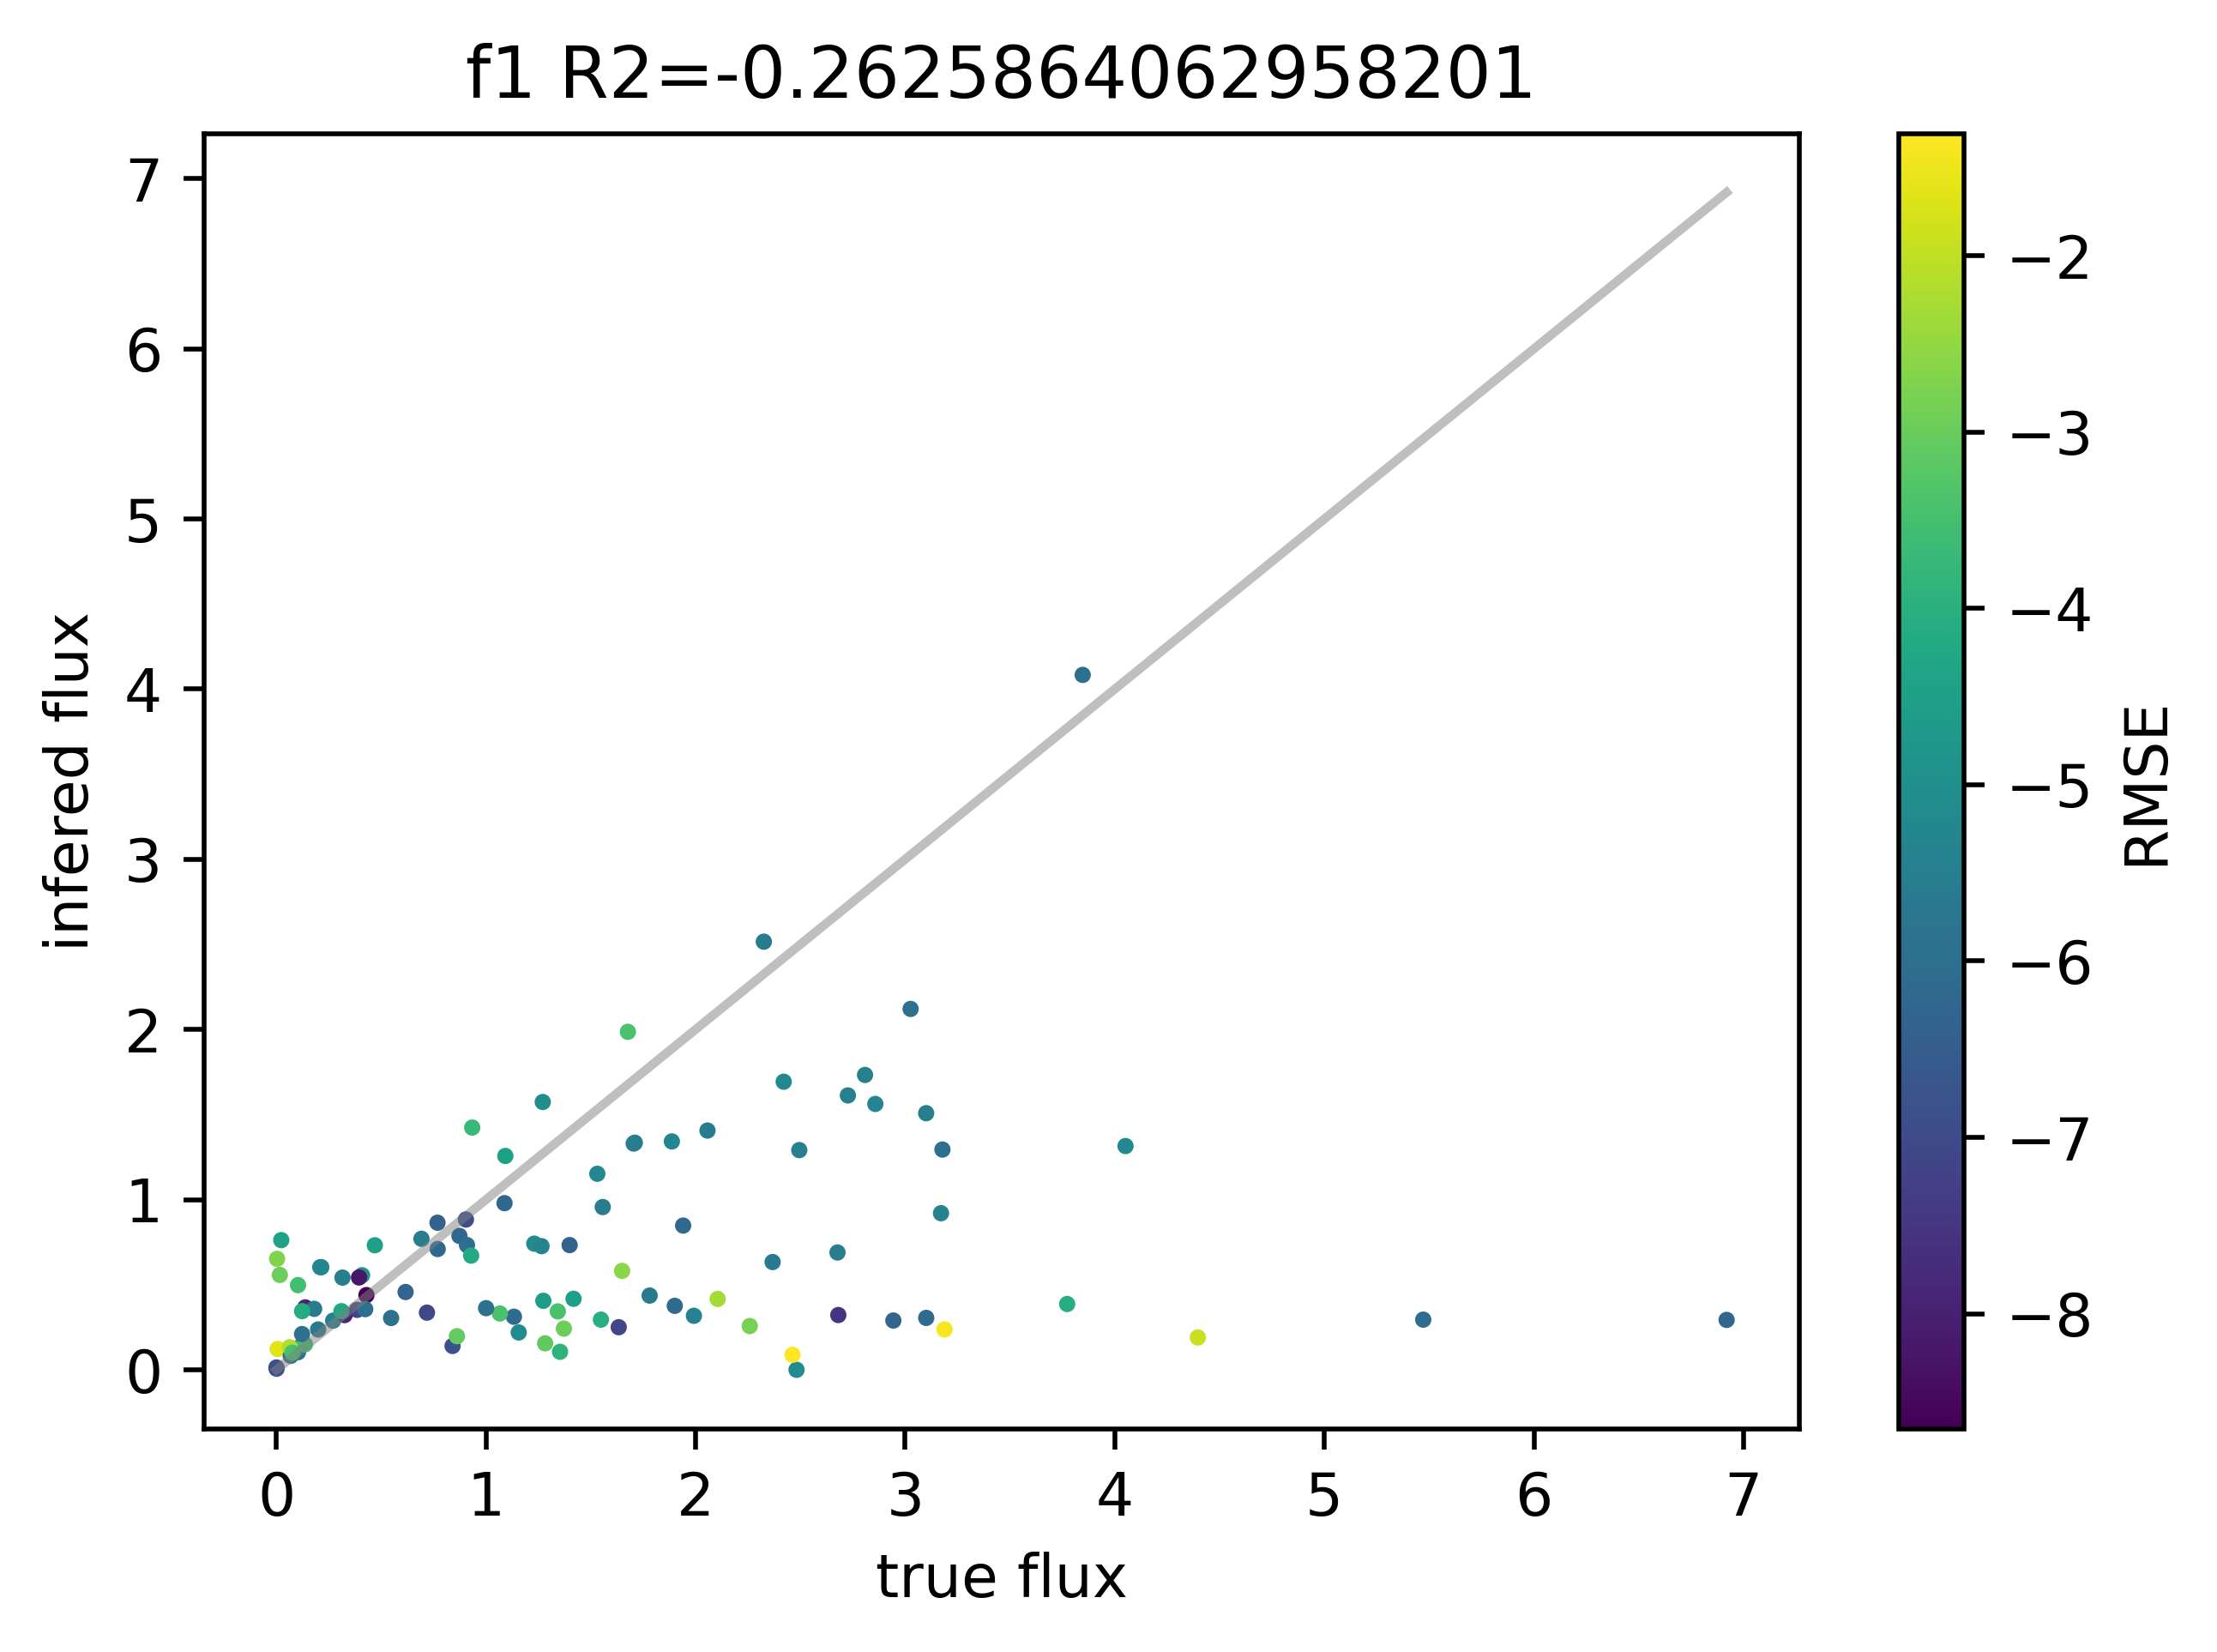

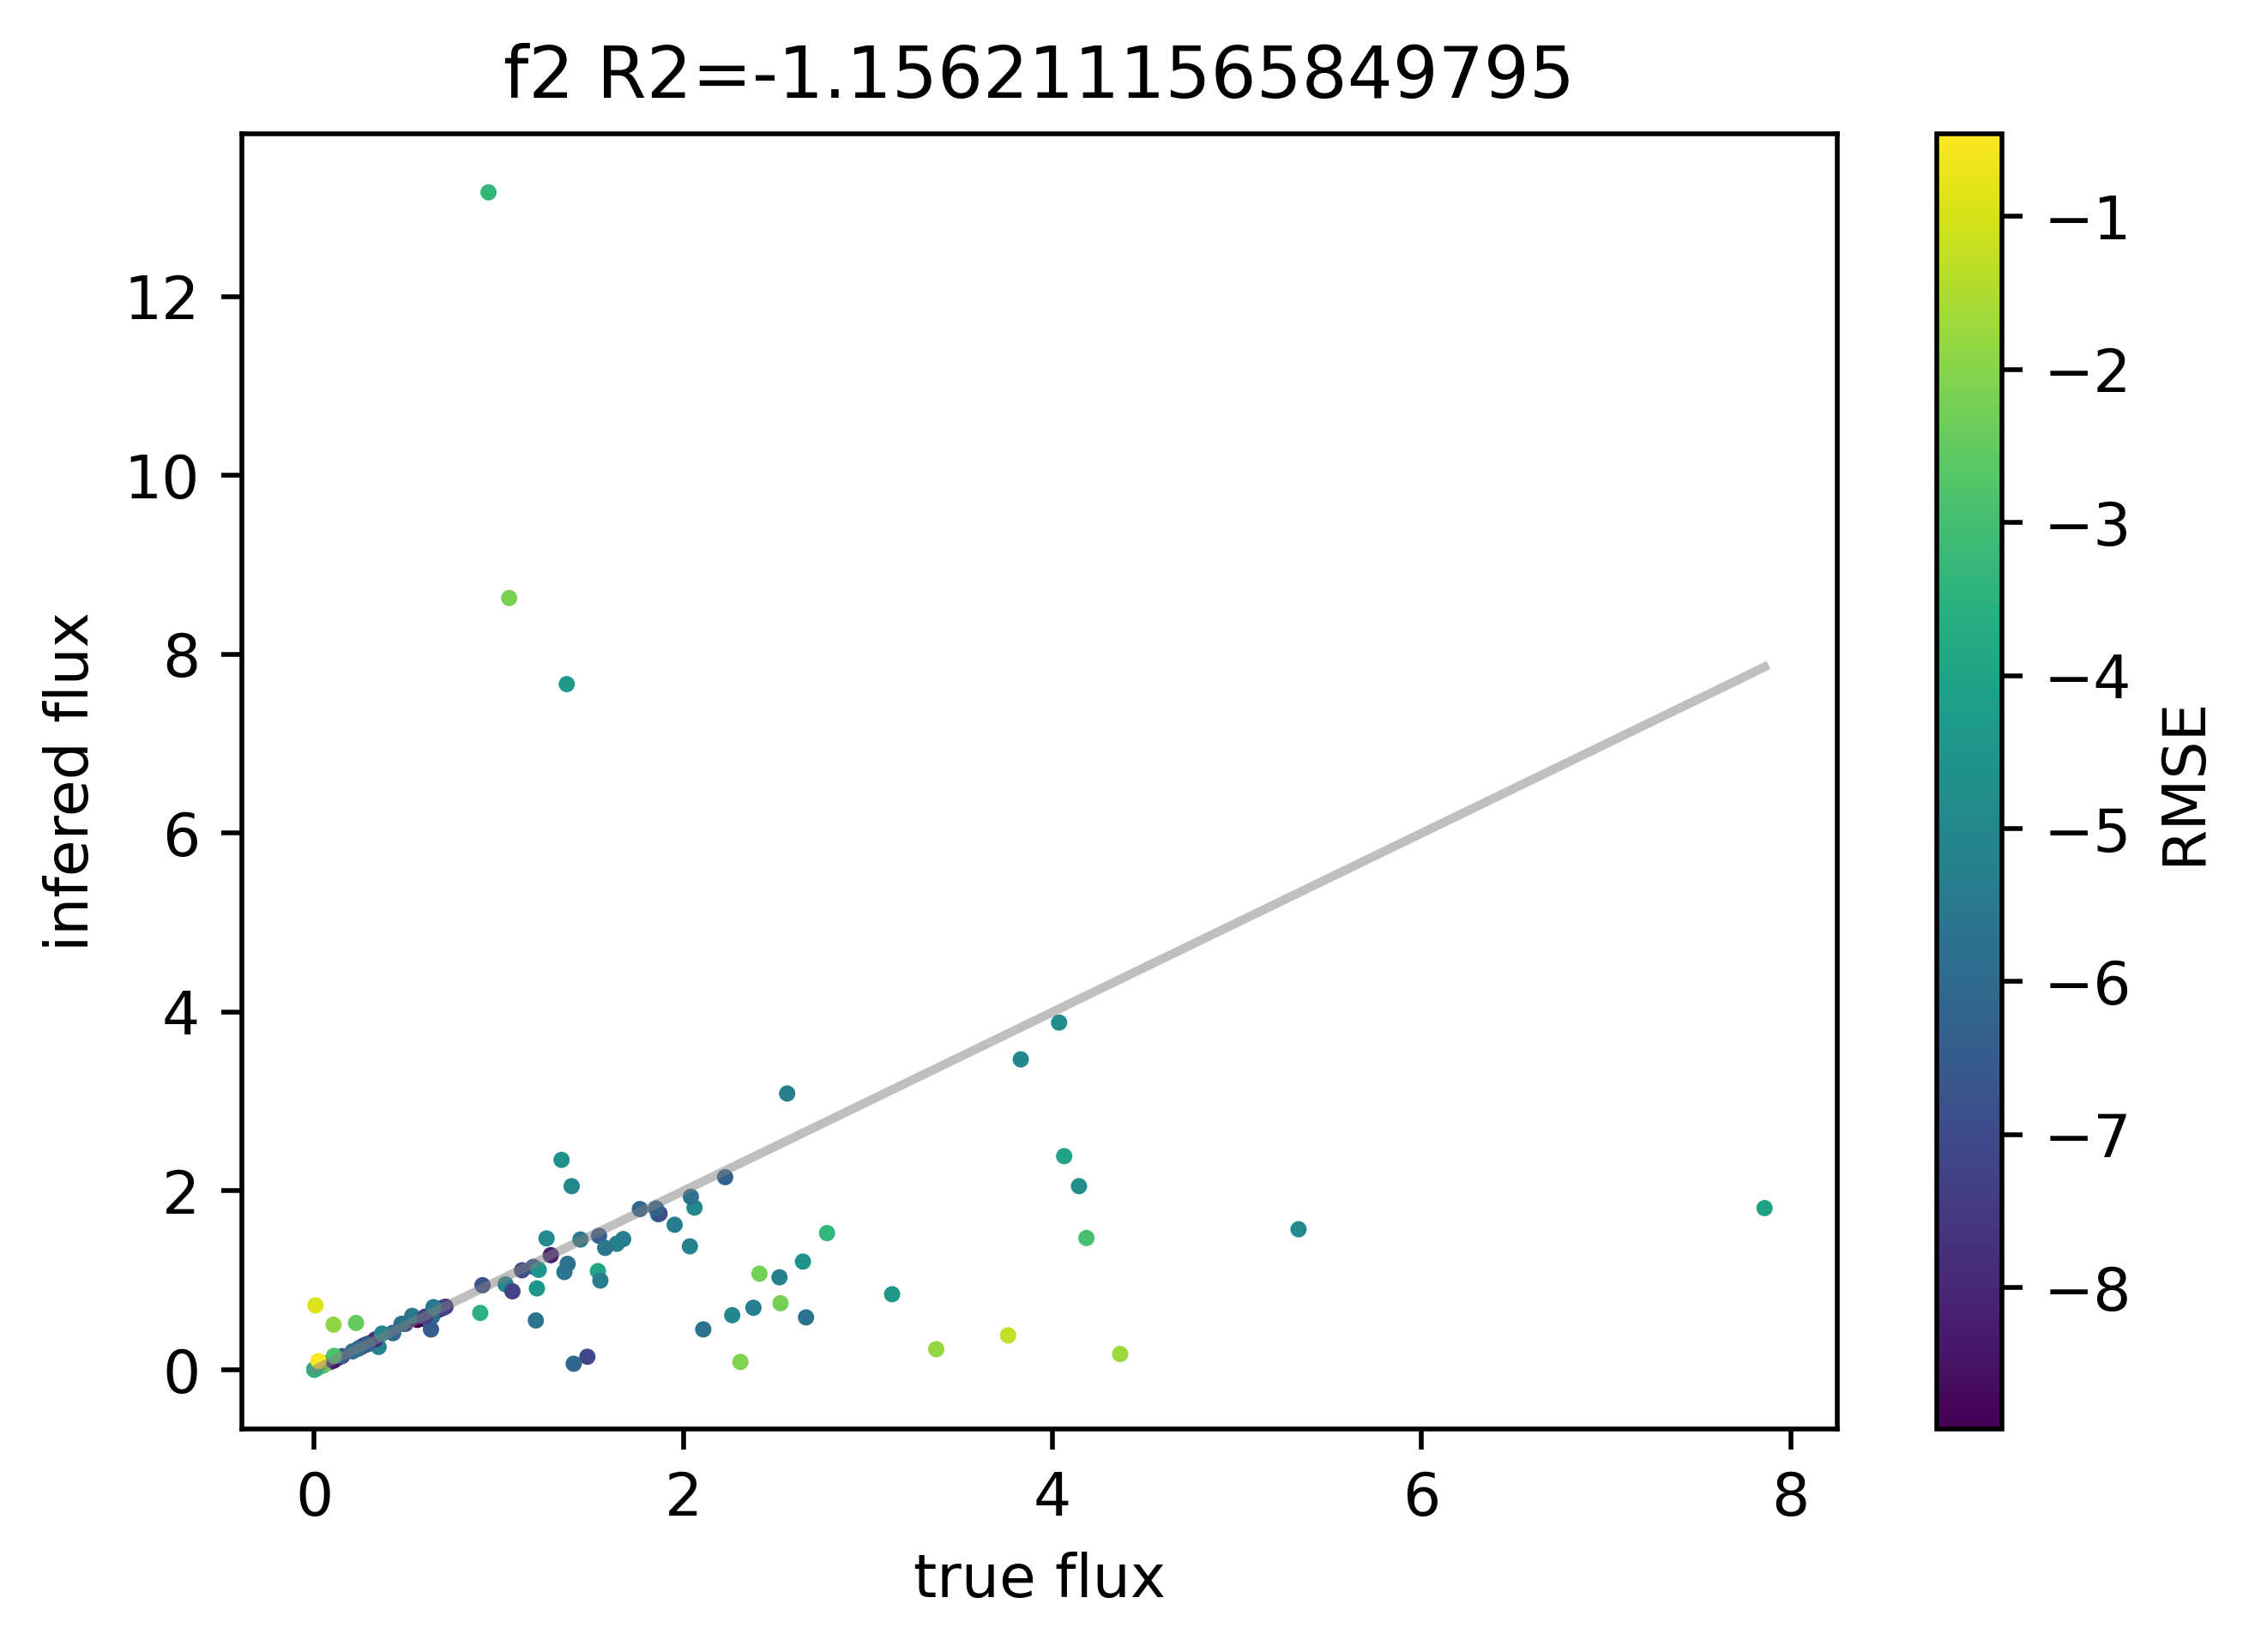

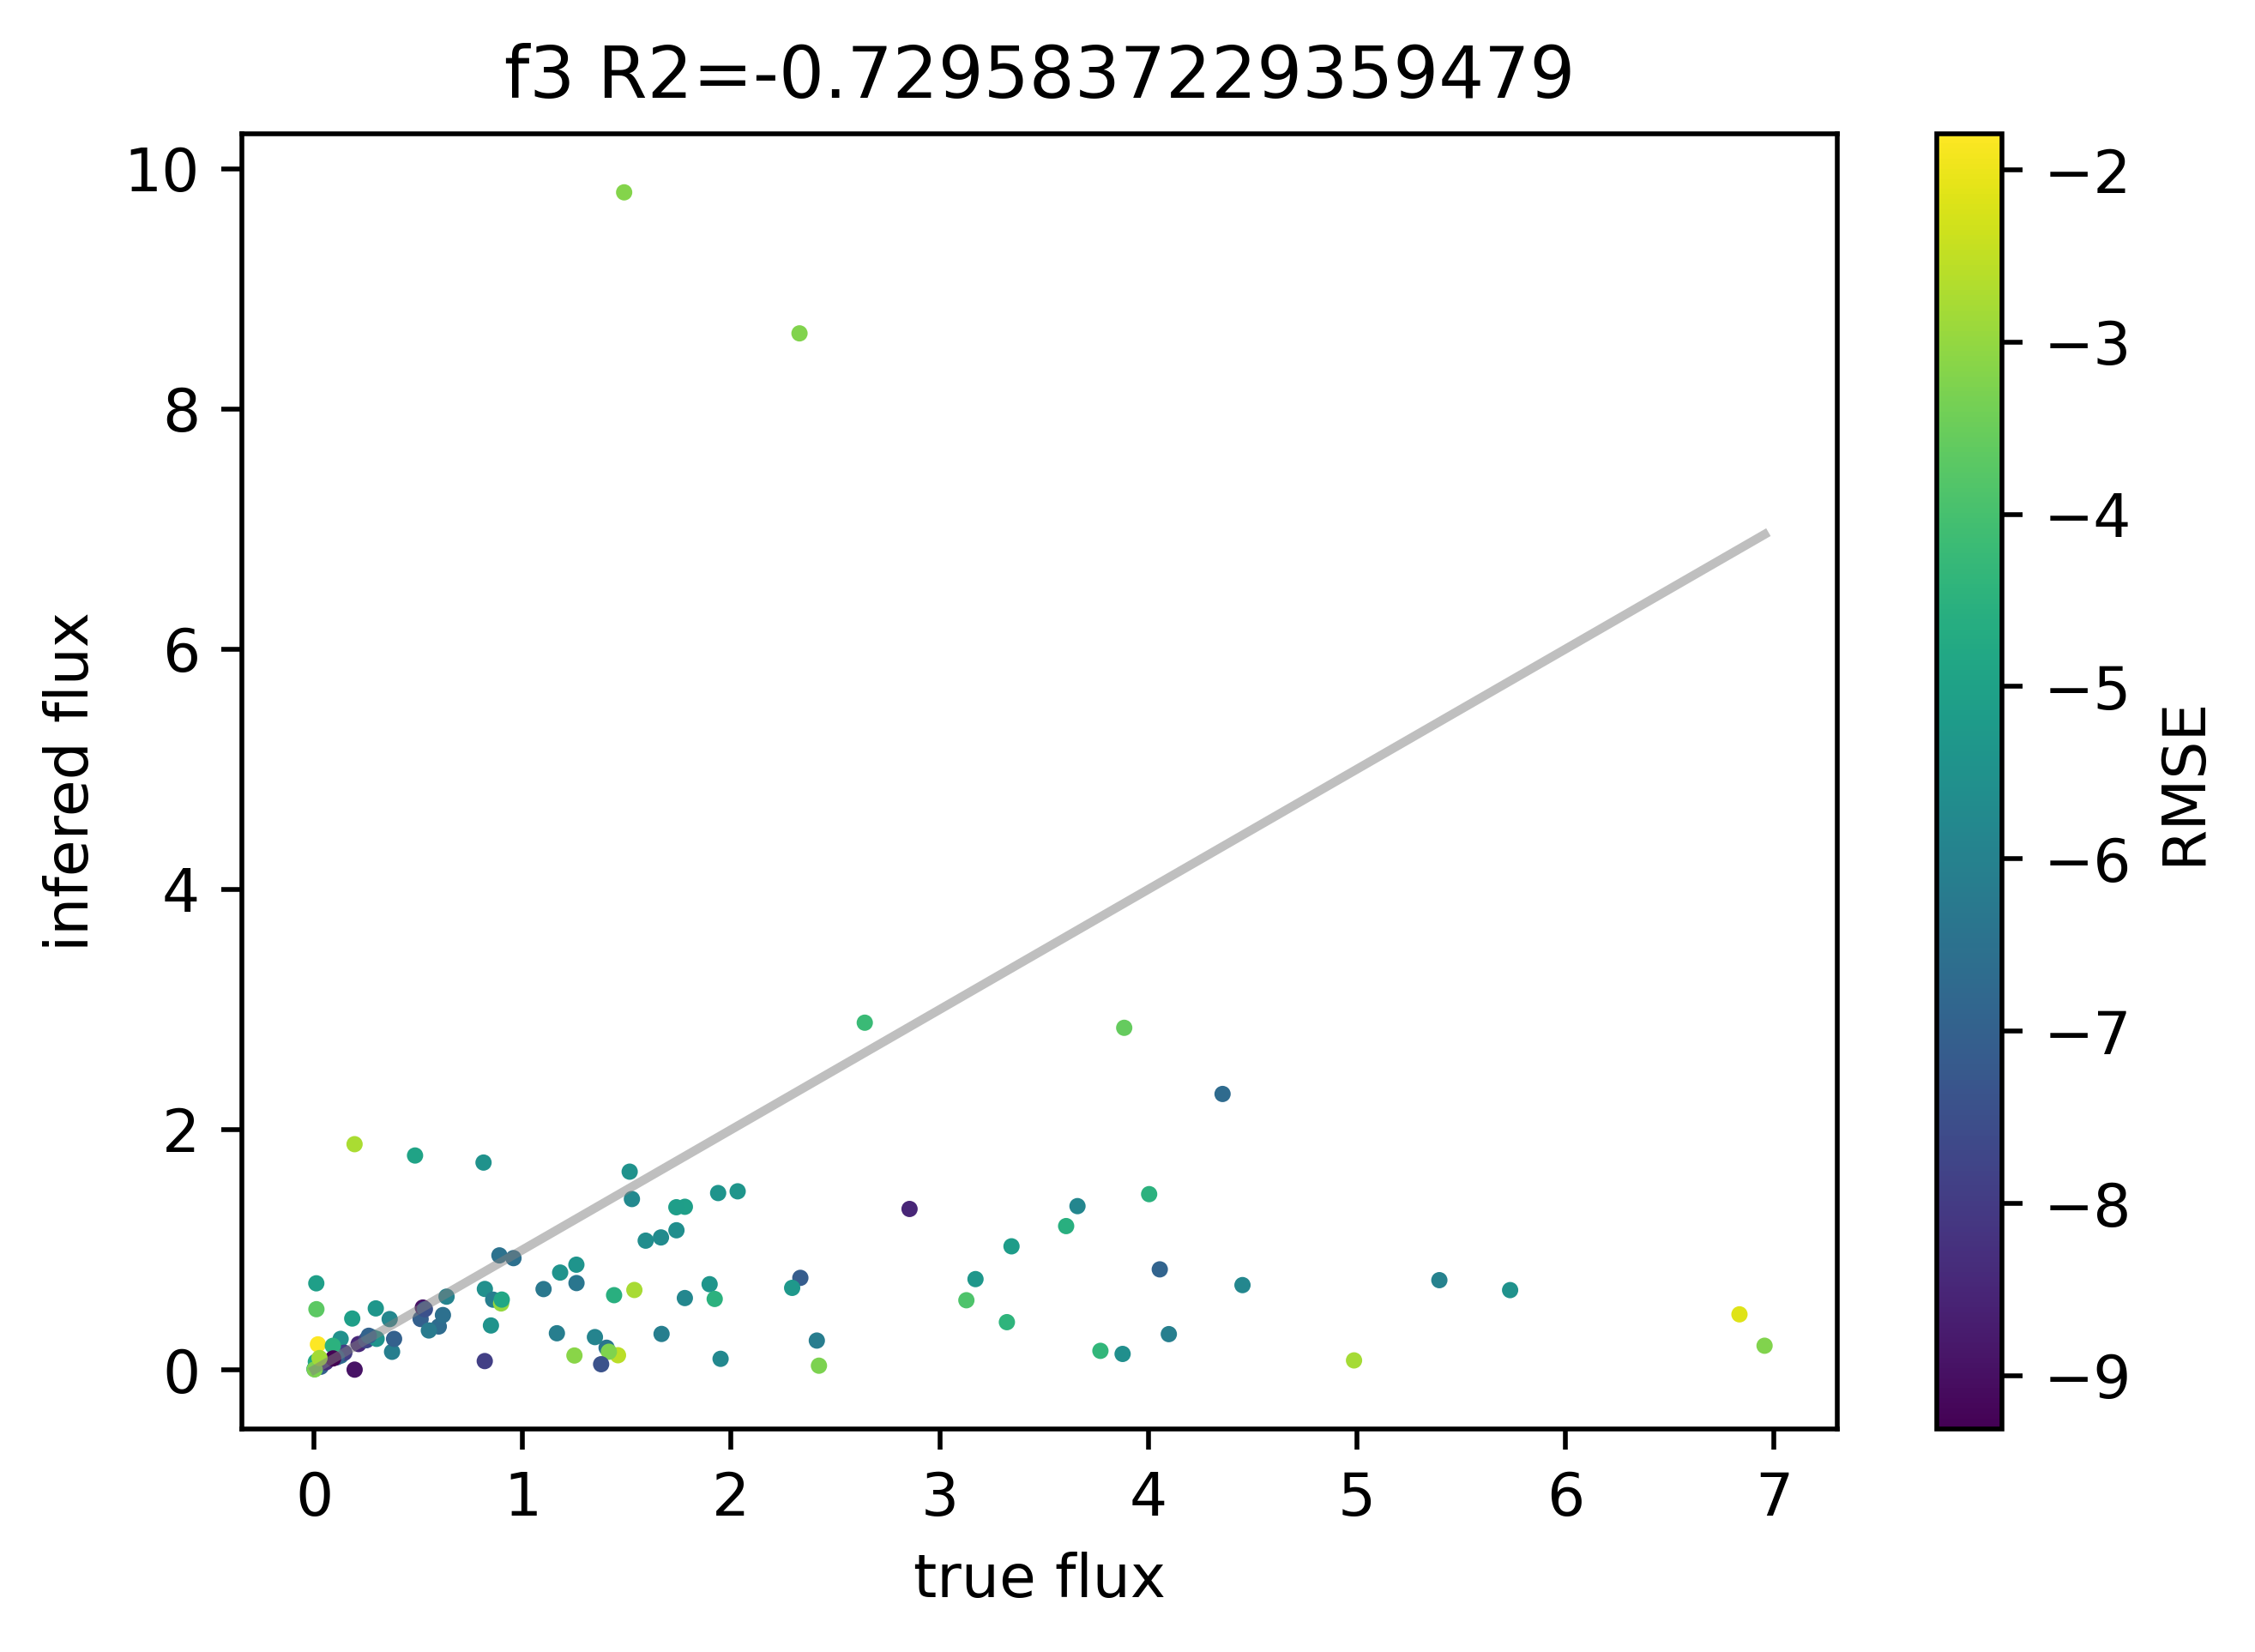

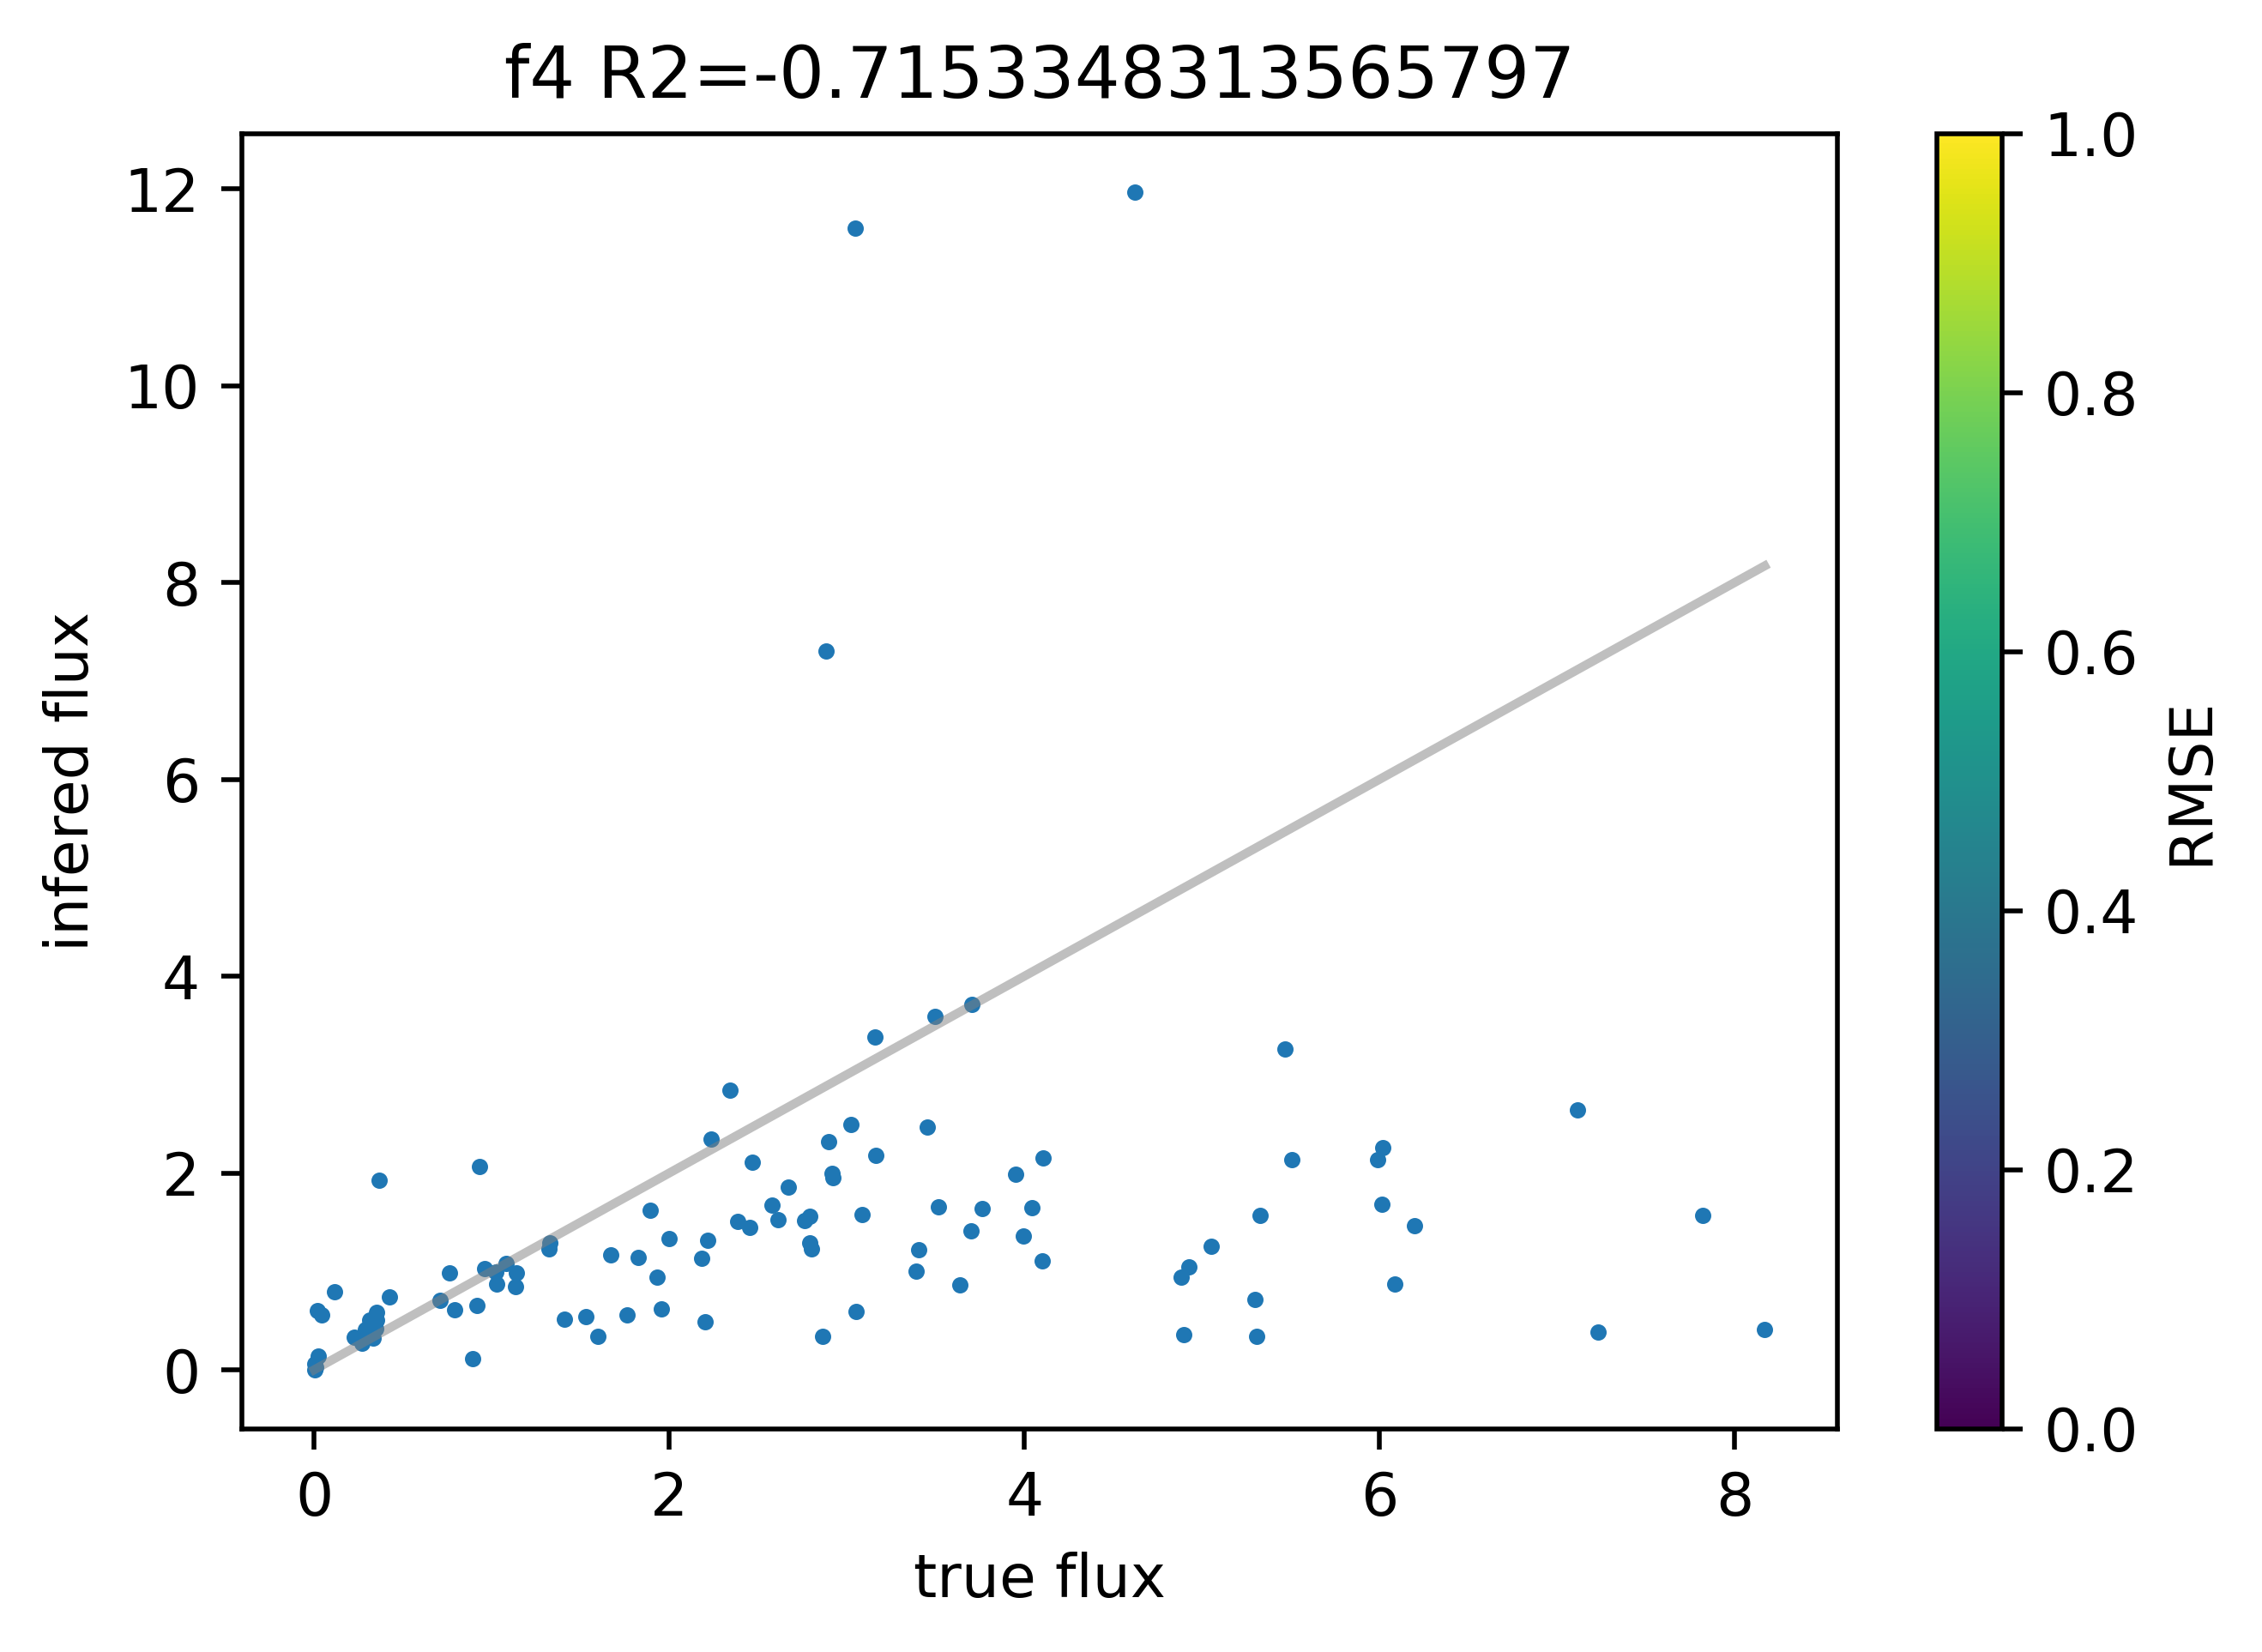

In [12]:
for x in range(pred.shape[1]):
    plt.figure()
    if x != 3: plt.scatter(true[:,x],pred[:,x],s=3,c=np.log10(err[:,x]))
    else: plt.scatter(true[:,x],pred[:,x],s=3)
    plt.plot([0,max(true[:,x])],[0,max(true[:,x])],color="grey",alpha=.5)
    plt.title("f" + str(x+1) + " R2=" + str(r2_score(true[:,x],pred[:,x])))
    #plt.ylim([0,max(true[:,x])])
    plt.colorbar(label="RMSE")
    plt.xlabel("true flux")
    plt.ylabel("infered flux")

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


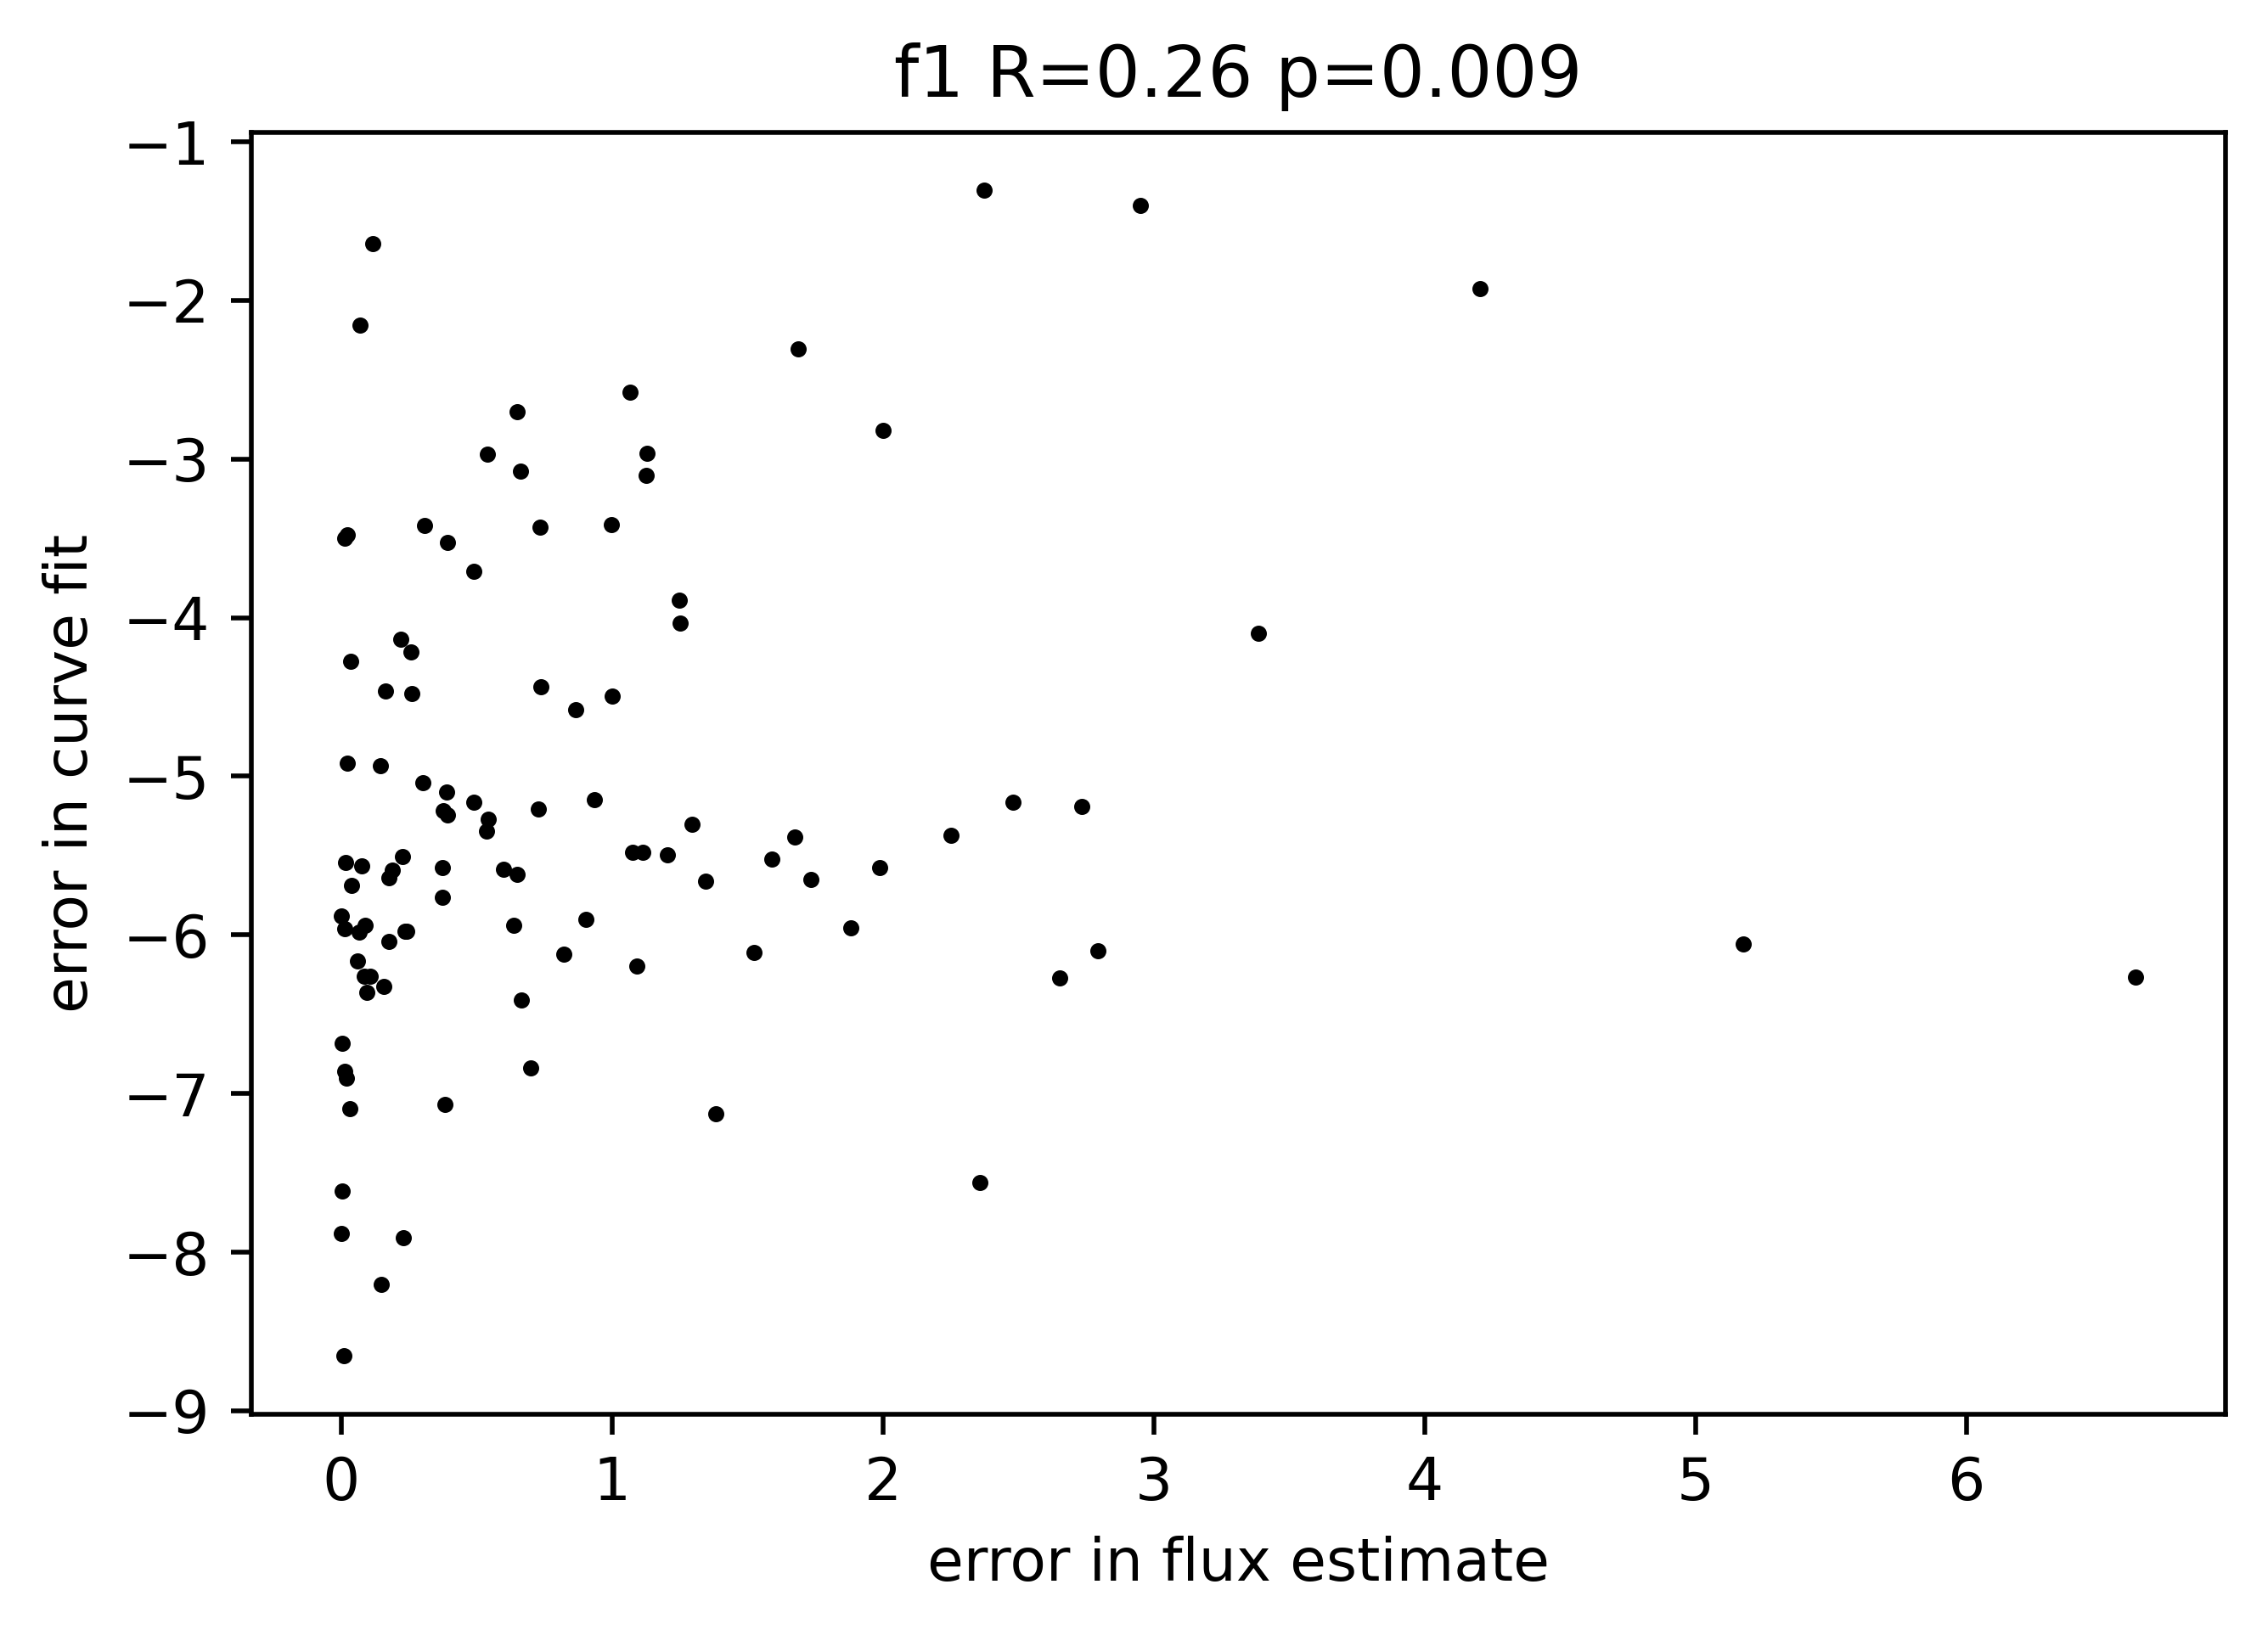

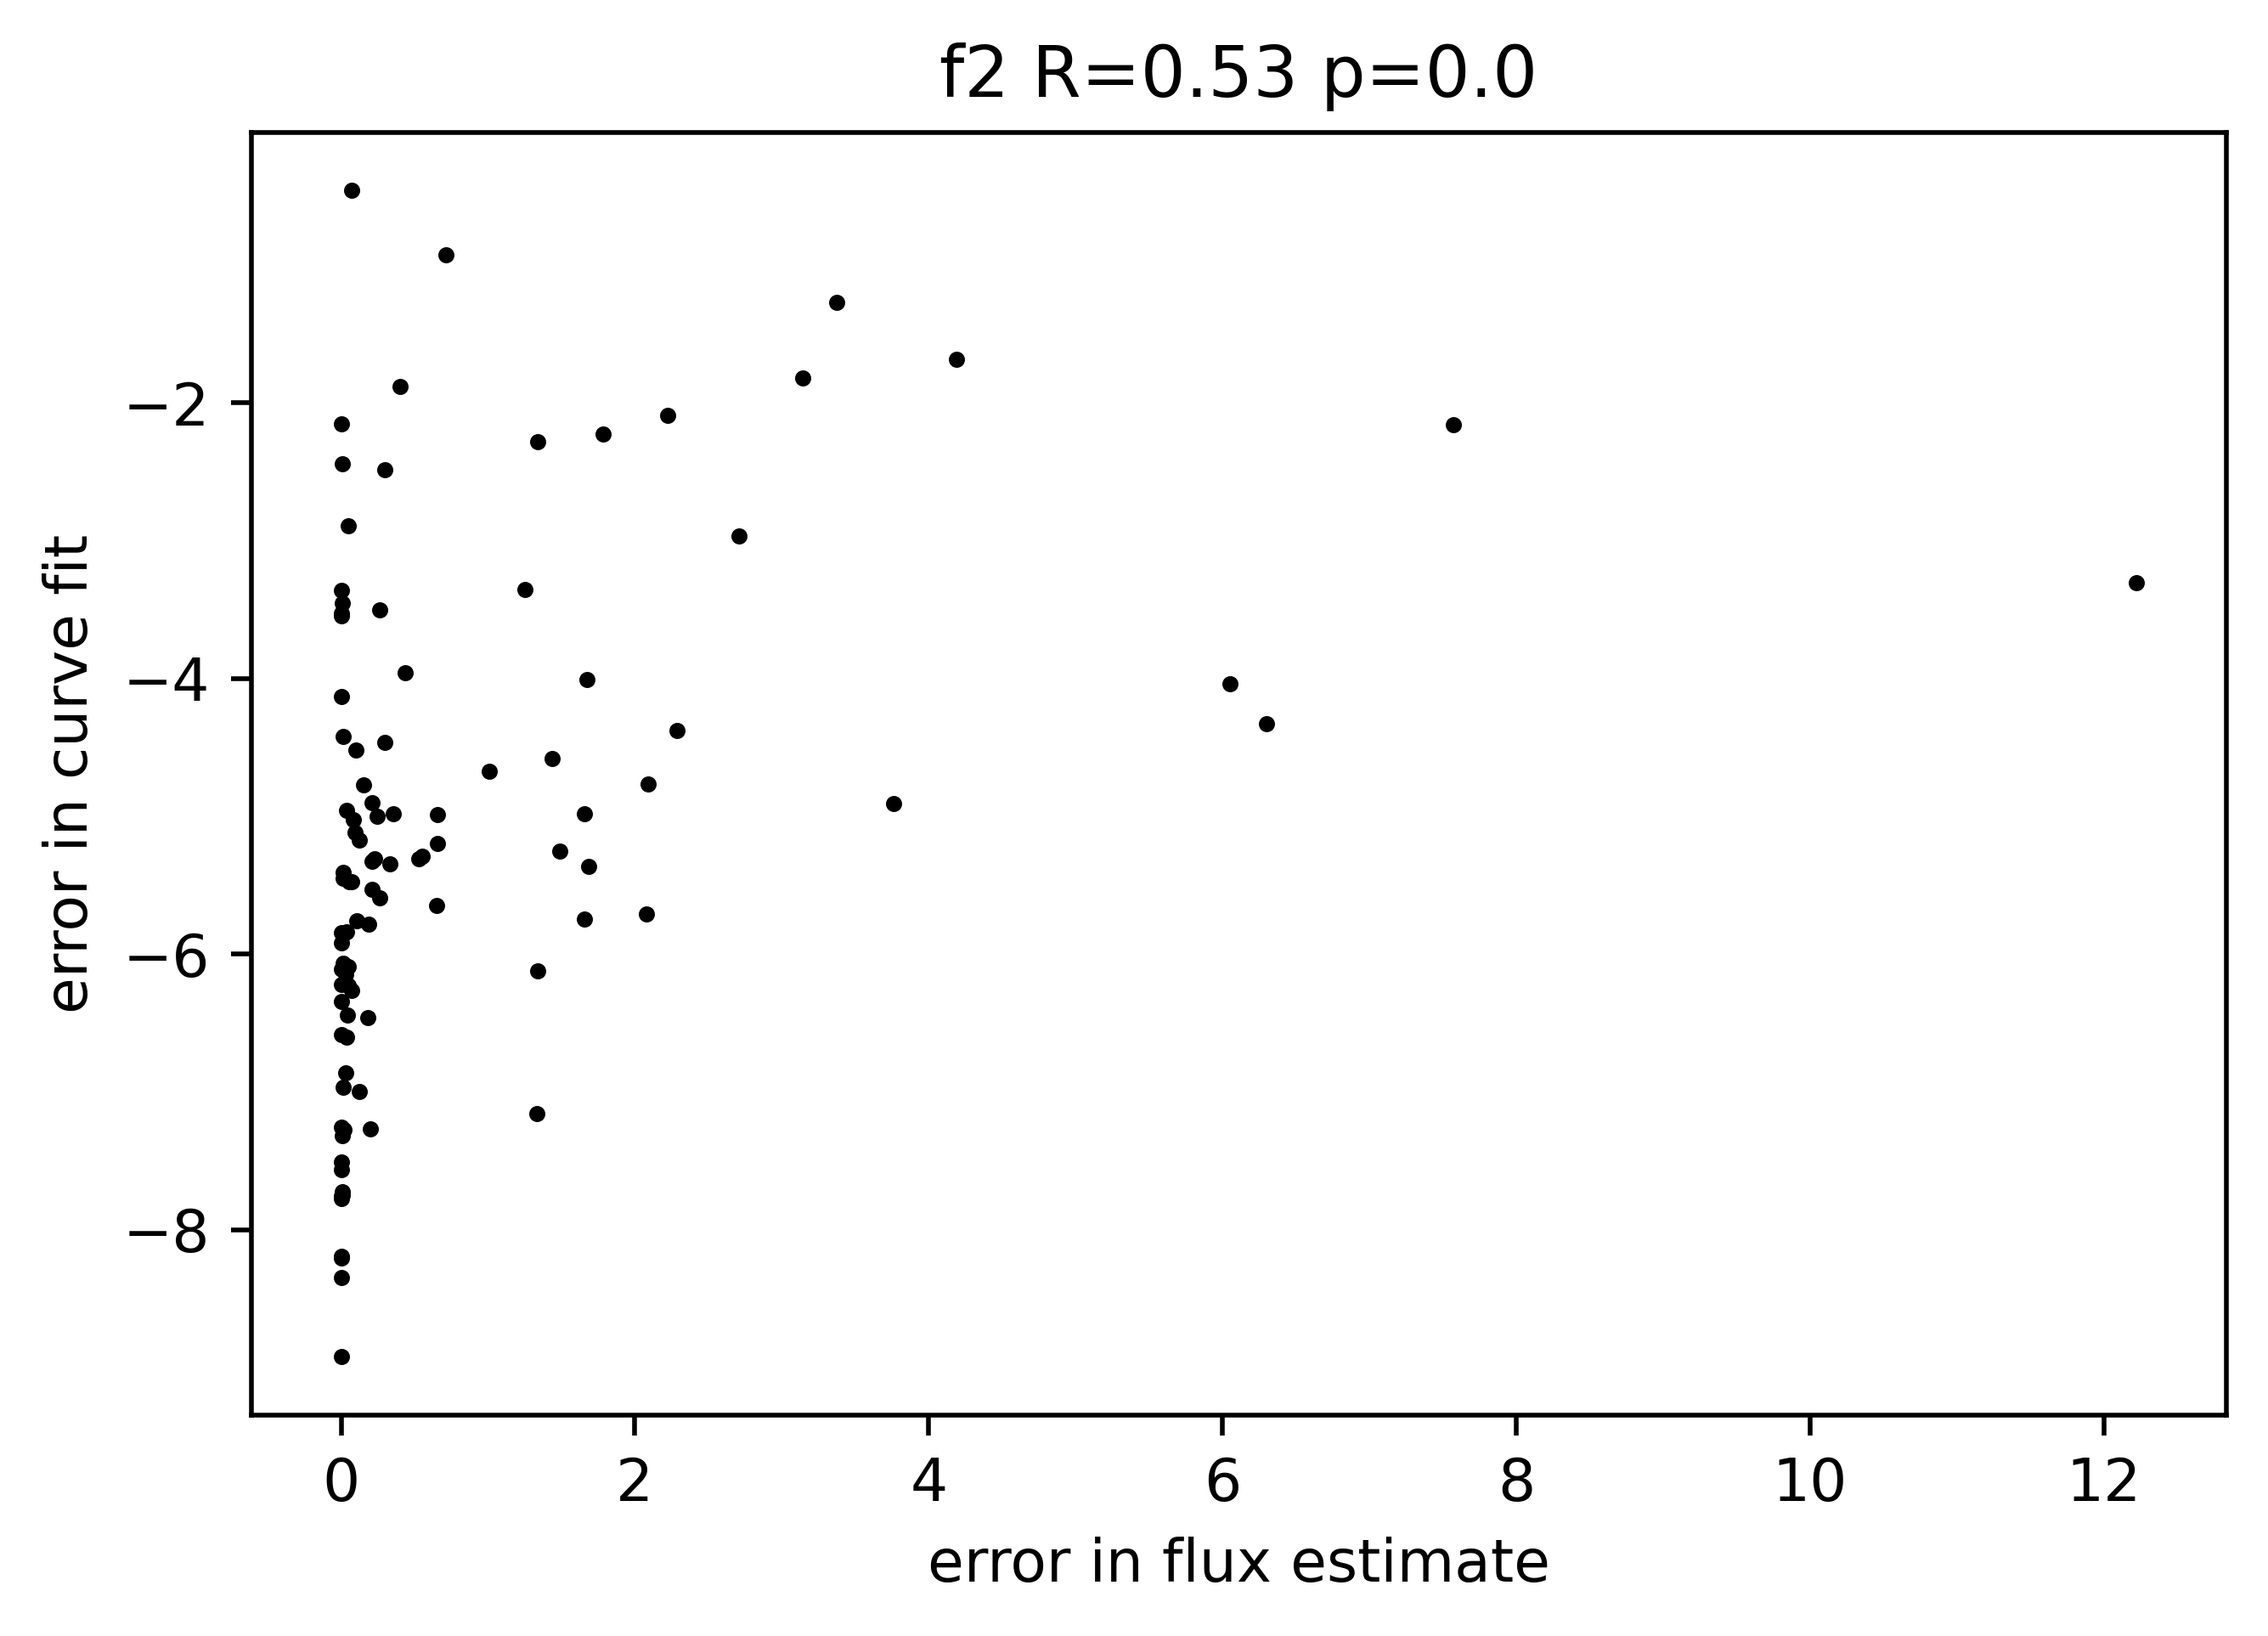

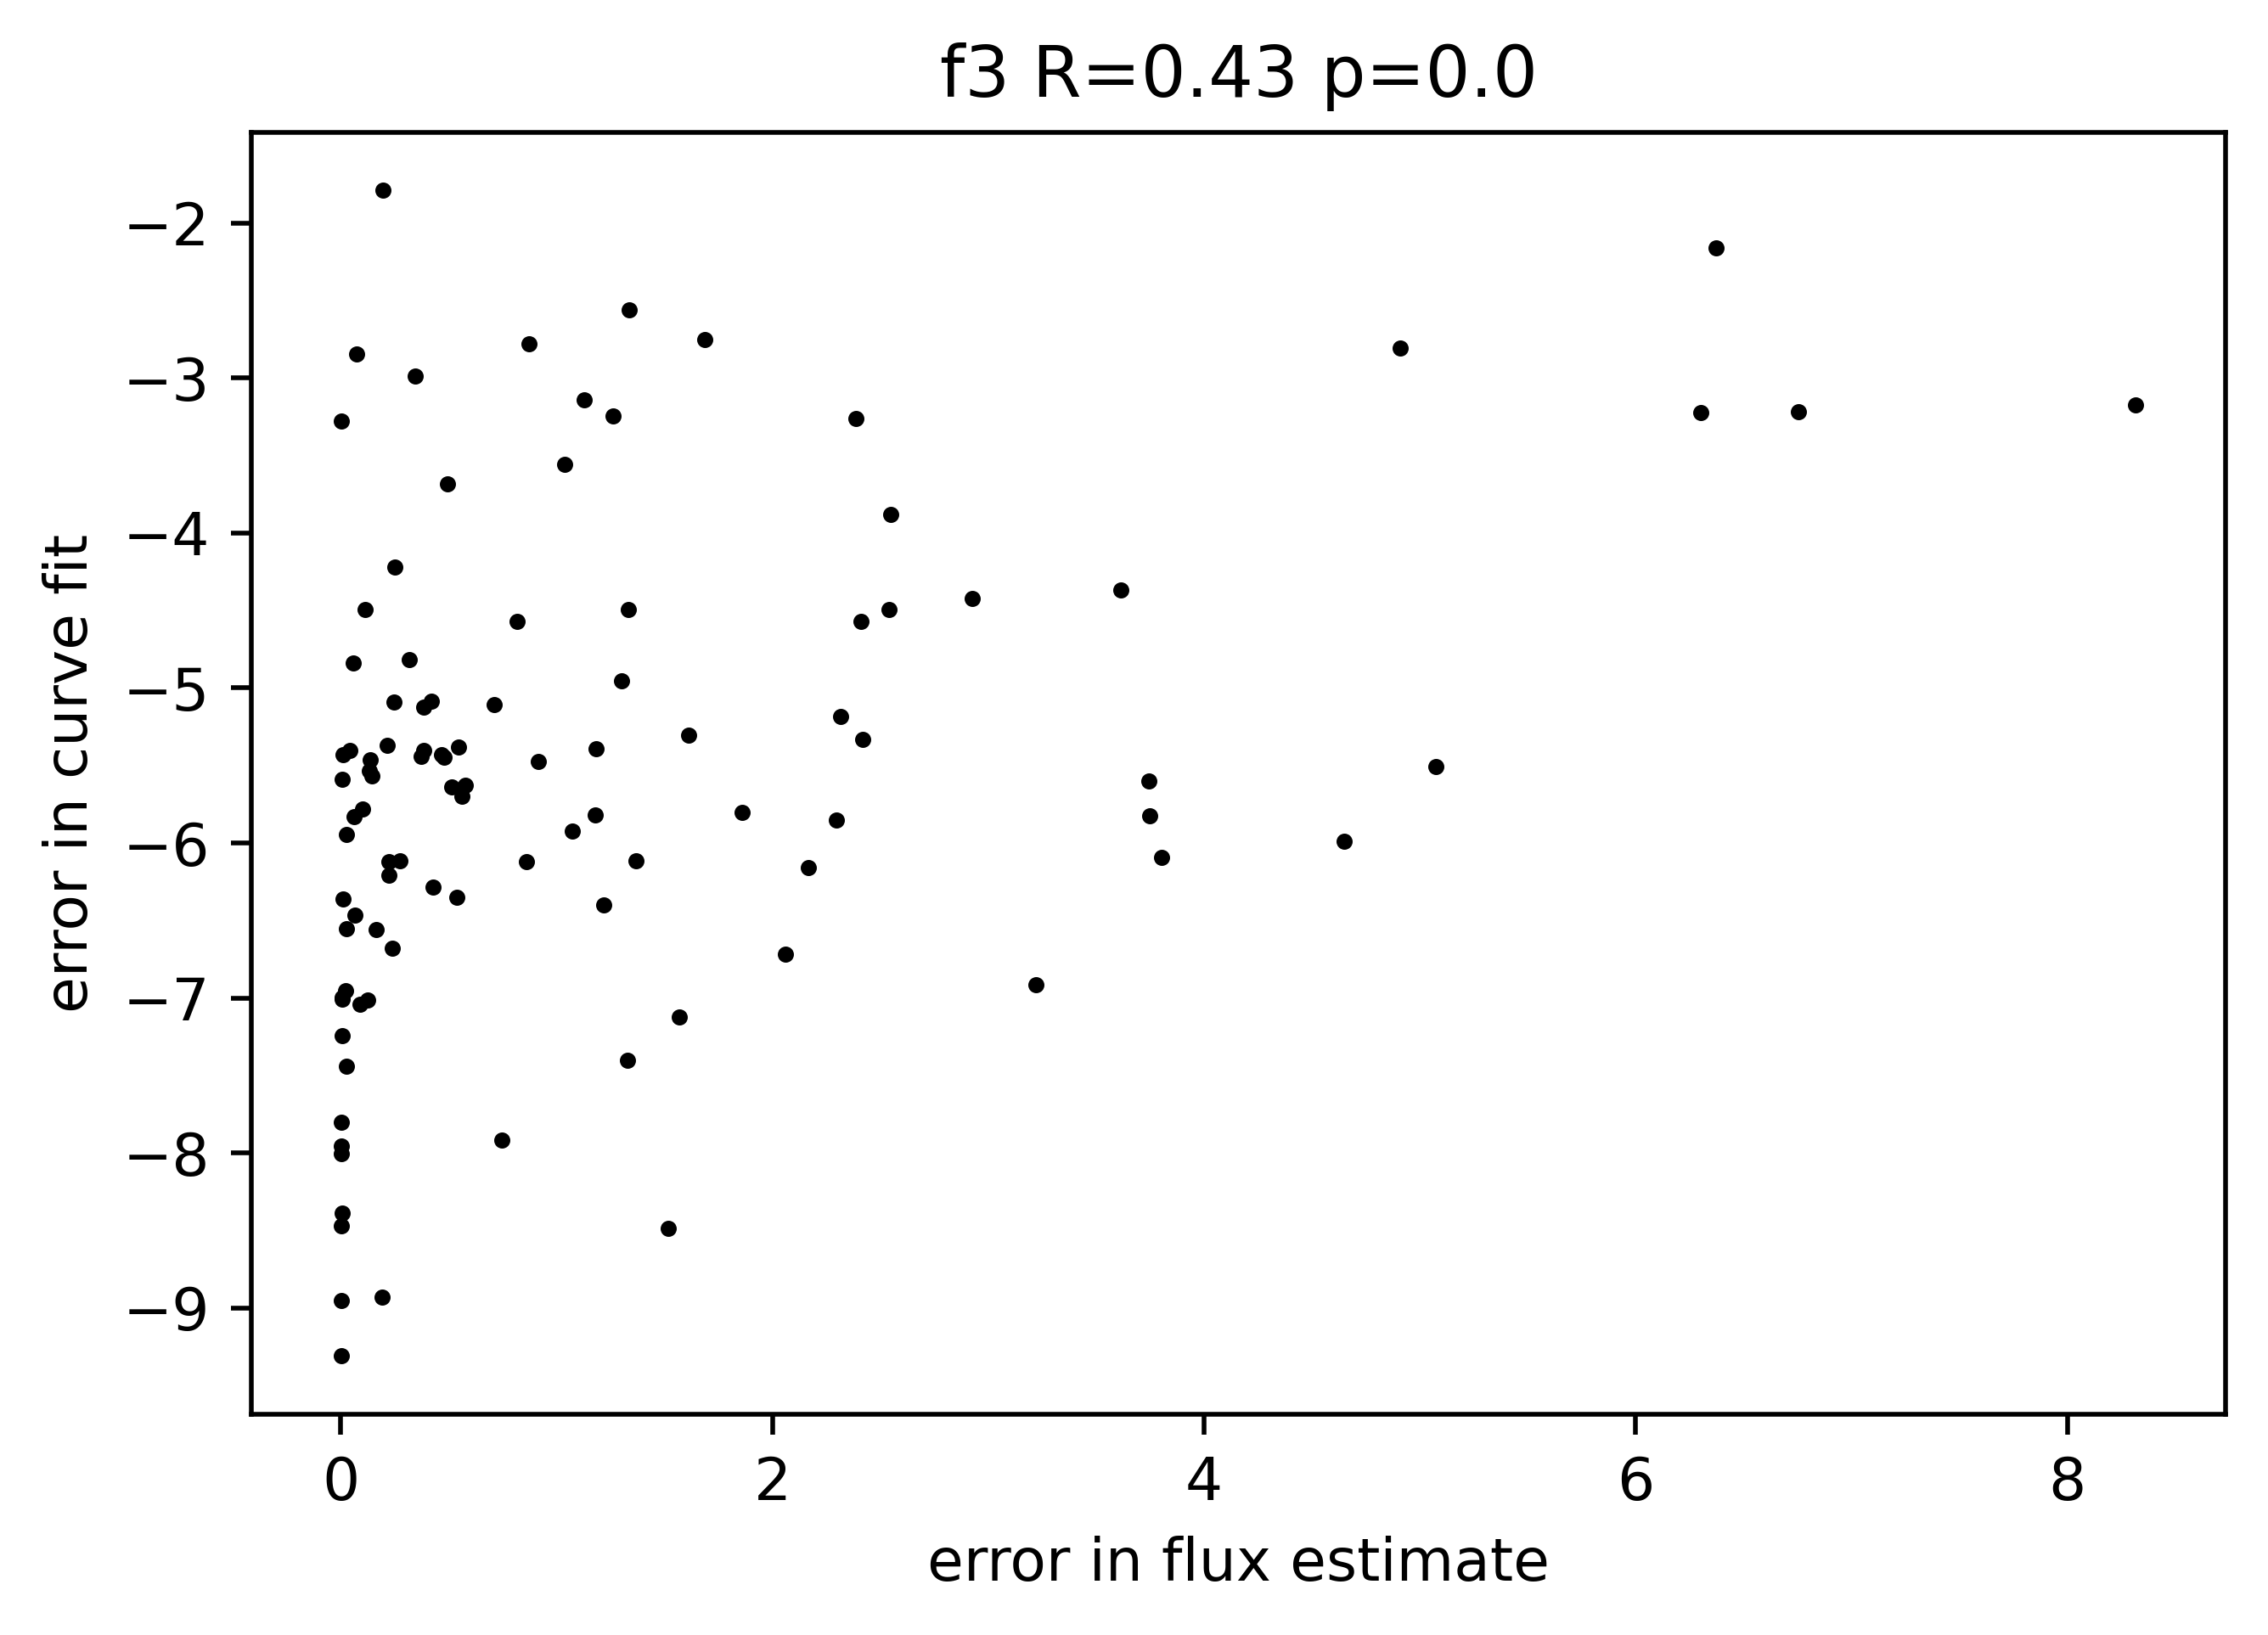

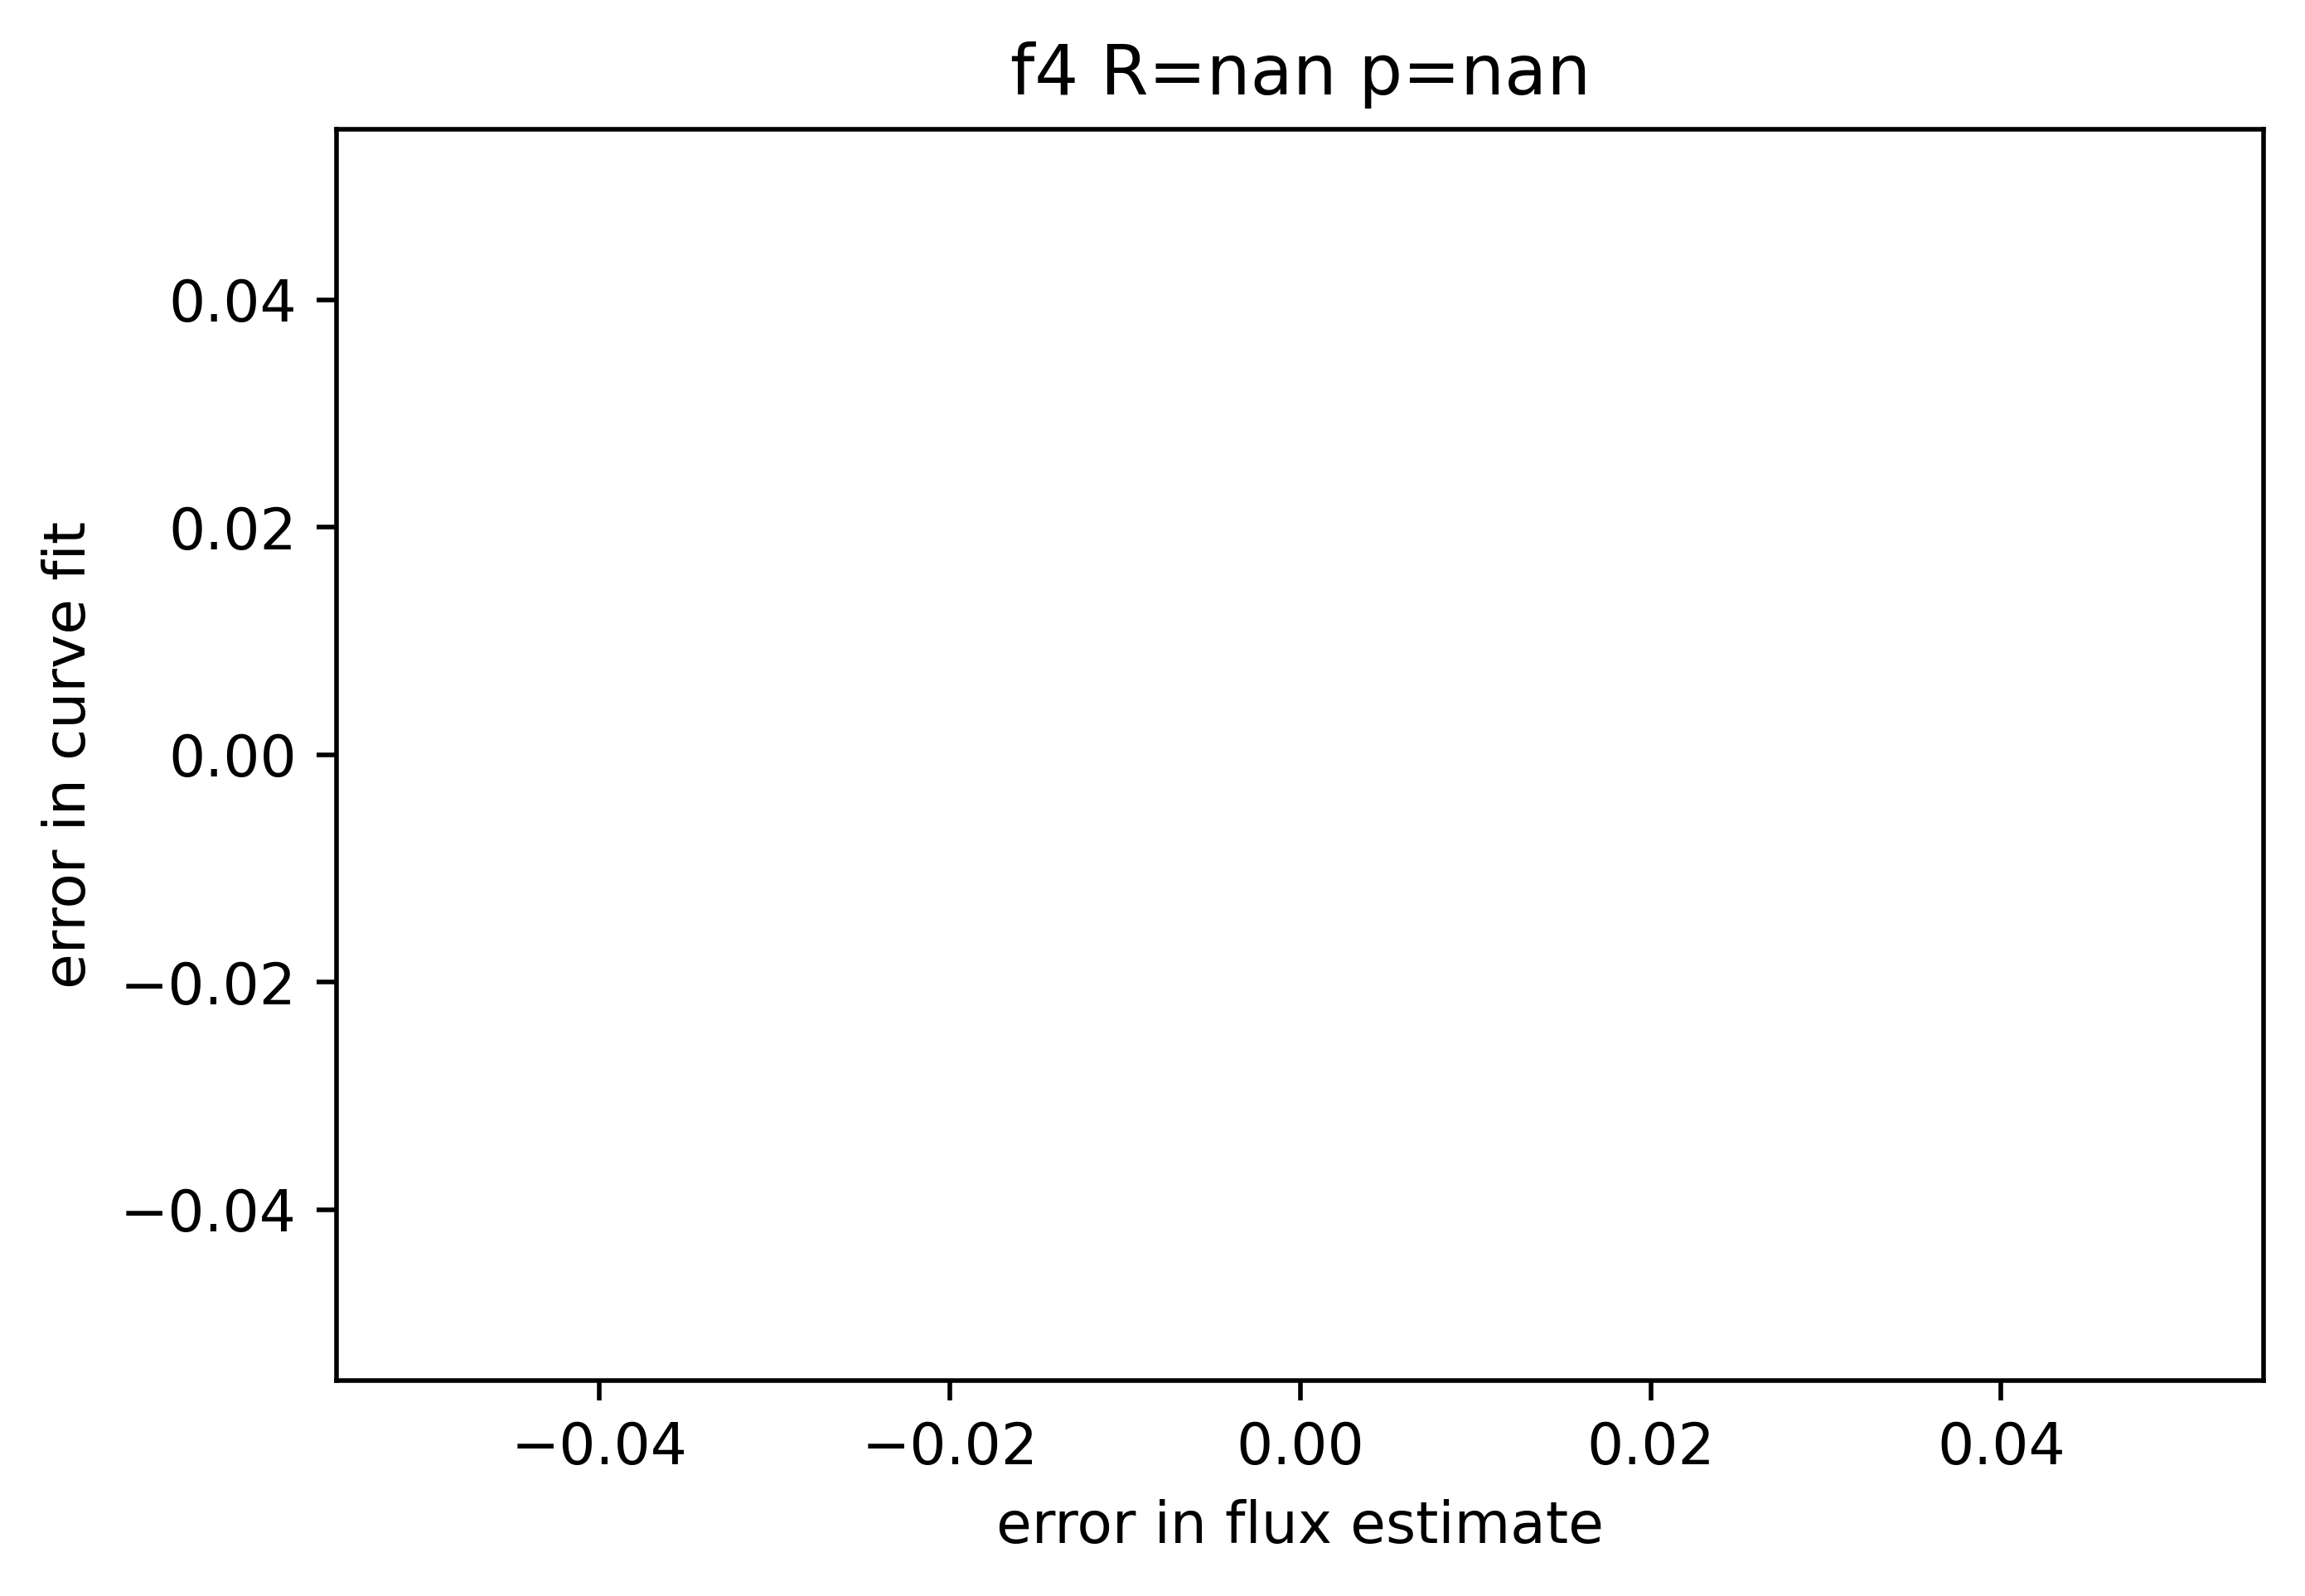

In [13]:
for x in range(pred.shape[1]):
    plt.figure()
    errs = np.abs(true[:,x]-pred[:,x])
    plt.scatter(errs,np.log10(err[:,x]),s=3,color="black")
    stat,p = stats.spearmanr(errs,err[:,x])
    plt.title("f" + str(x+1) + " R=" + str(np.round(stat,2)) + " p=" + str(np.round(p,3)))
    plt.xlabel("error in flux estimate")
    plt.ylabel("error in curve fit")

In [14]:
true

array([[2.48173262e+00, 2.06050030e+00, 3.66064847e+00, 5.50809530e+00],
       [1.09222875e+00, 1.36836738e+00, 3.60628169e+00, 3.15661601e+00],
       [2.68095040e+00, 2.04078705e+00, 5.73557086e+00, 6.01226124e+00],
       [1.70468961e+00, 1.54327566e+00, 1.40232374e+00, 2.57960348e+00],
       [2.94358764e+00, 4.06341163e+00, 3.17157697e+00, 6.08773067e+00],
       [1.63323557e+00, 1.25869288e+00, 1.26708678e-01, 1.95534570e+00],
       [5.81539330e-03, 2.07024563e-02, 1.78387893e-02, 2.24777667e-02],
       [1.67680596e+00, 1.05614331e+00, 2.32748287e+00, 3.04894425e+00],
       [6.82009755e-02, 4.93906153e-01, 8.88259235e-01, 9.61575612e-01],
       [3.25031721e-01, 8.45115821e-02, 2.12871787e-01, 3.29742220e-01],
       [1.23027854e+00, 1.44231042e+00, 1.10000621e+00, 2.00009446e+00],
       [1.37716823e-01, 2.53190521e-01, 1.44643199e-01, 3.49305574e-01],
       [1.26489487e+00, 1.63923813e+00, 1.58989961e+00, 3.45405365e+00],
       [2.70494449e-01, 5.33340485e+00, 5.39619439e